In [2]:
# -------------------------------------------------------------
# Fuzzy TCAP Experiments: All Target Variables, Depths, and Weights
# -------------------------------------------------------------
# This notebook runs all 144 experiments across:
# - 3 target variables
# - 4 key depth levels
# - 3 weighting strategies (equal, data availability, intruder knowledge)
#
# Also includes a reference run of the original TCAP code
# and its replication using Fuzzy TCAP settings 
# (equal weights + fixed depth) for validation and comparison.


In [4]:
# CANADA RELIGION ORIGINAL TCAP for reference
import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv",
     "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv",
     False,
    1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/canada2011_tcap_real_relig.csv
Target dataset is:  /Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv
The key size is:  6
Maximum source equivalence class size is set to:  32149
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.051
The target dataset CAP score with non-matches scored as zero is: 0.043
The baseline value for the source dataset is: 0.182
-------------------------------------------------------------------------------


In [6]:
# CANADA RELIGION EQUAL WEIGHTS MIN-MAX DEPTH 6-6 - to ensure consistency with original tcap
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'age': 1,
        'sex': 1,
        'minority': 1,
        'marstat': 1,
        'empstat': 1,
        'birthplace': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.0505
The target dataset CAP score with non-matches scored as zero is: 0.0426
Matches = 27104
Correct matches (count) = 1370
(Sum of proportions used internally = 1370.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace'): matches=27104, correct_matches=1370

Final overall CAP (undef): 0.0505
Final overall CAP (zero):  0.0426
Total matches: 27104, Correct matches: 1370, Baseline: 0.1823

=== Variable-Level Risk Contribution Scores ===
age: Count=27104, Avg CAP=0.0505, Risk Contribution Score=0.0426
sex: Count=27104, Avg CAP=0.0505, Risk Contribution Score=0.0426
marstat: Count=27104, Avg CAP=0.0505, Risk

In [8]:
# CANADA RELIGION EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'age': 1,
        'sex': 1,
        'minority': 1,
        'marstat': 1,
        'empstat': 1,
        'birthplace': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823

=== Stage 2 Integrat

In [69]:
# CANADA RELIGION EQUAL WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'age': 1,
        'sex': 1,
        'minority': 1,
        'marstat': 1,
        'empstat': 1,
        'birthplace': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823
[Stage1] keys=('age',

In [71]:
# CANADA RELIGION EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'age': 1,
        'sex': 1,
        'minority': 1,
        'marstat': 1,
        'empstat': 1,
        'birthplace': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823
[Stage1] keys=('age',

In [73]:
# CANADA RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823

=== Stage 2 Integrat

In [75]:
# CANADA RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823
[Stage1] keys=('age',

In [77]:
# CANADA RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823
[Stage1] keys=('age',

In [81]:
# CANADA RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'minority': 0.333,
        'birthplace': 0.297,
        'age': 0.118,         
        'empstat': 0.098,
        'marstat': 0.096,
        'sex': 0.058
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823

=== Stage 2 Integrat

In [83]:
# CANADA RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'minority': 0.333,
        'birthplace': 0.297,
        'age': 0.118,         
        'empstat': 0.098,
        'marstat': 0.096,
        'sex': 0.058
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823
[Stage1] keys=('age',

In [85]:
# CANADA RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'minority': 0.333,
        'birthplace': 0.297,
        'age': 0.118,         
        'empstat': 0.098,
        'marstat': 0.096,
        'sex': 0.058
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823
[Stage1] keys=('age',

In [85]:
# CANADA RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'relig'

    key_weights = {
        'minority': 0.333,
        'birthplace': 0.297,
        'age': 0.118,         
        'empstat': 0.098,
        'marstat': 0.096,
        'sex': 0.058
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_relig.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1823

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0505 | CAP zero=0.0426 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0238 | CAP zero=0.0227 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.0454 | CAP zero=0.0401 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0368 | baseline=0.1823
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.0431 | CAP zero=0.0388 | baseline=0.1823
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0424 | CAP zero=0.0376 | baseline=0.1823
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0117 | CAP zero=0.0115 | baseline=0.1823
[Stage1] keys=('age',

In [89]:
# CANADA CITIZEN ORIGINAL TCAP

import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv",
     "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv
Target dataset is:  /Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv
The key size is:  6
Maximum source equivalence class size is set to:  32149
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.931
The target dataset CAP score with non-matches scored as zero is: 0.785
The baseline value for the source dataset is: 0.698
-------------------------------------------------------------------------------


In [91]:
# CANADA CITIZEN EQUAL WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'minority': 1,
        'birthplace': 1,
        'age': 1,         
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.9312
The target dataset CAP score with non-matches scored as zero is: 0.7851
Matches = 27104
Correct matches (count) = 25240
(Sum of proportions used internally = 25240.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace'): matches=27104, correct_matches=25240

Final overall CAP (undef): 0.9312
Final overall CAP (zero):  0.7851
Total matches: 27104, Correct matches: 25240, Baseline: 0.6984

=== Variable-Level Risk Contribution Scores ===
age: Count=27104, Avg CAP=0.9312, Risk Contribution Score=0.7851
sex: Count=27104, Avg CAP=0.9312, Risk Contribution Score=0.7851
marstat: Count=27104, Avg CAP=0.9312, 

In [93]:
# CANADA CITIZEN EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'minority': 1,
        'birthplace': 1,
        'age': 1,         
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984

=== Stage 2 Integrat

In [95]:
# CANADA CITIZEN EQUAL WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'minority': 1,
        'birthplace': 1,
        'age': 1,         
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984
[Stage1] keys=('age',

In [97]:
# CANADA CITIZEN EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'minority': 1,
        'birthplace': 1,
        'age': 1,         
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984
[Stage1] keys=('age',

In [99]:
# CANADA CITIZEN DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984

=== Stage 2 Integrat

In [101]:
# CANADA CITIZEN DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984
[Stage1] keys=('age',

In [103]:
# CANADA CITIZEN DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984
[Stage1] keys=('age',

In [105]:
# CANADA CITIZEN INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'minority': 0.294,
        'birthplace': 0.482,
        'age': 0.096,
        'empstat': 0.033,
        'marstat': 0.087,
        'sex': 0.008
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984

=== Stage 2 Integrat

In [107]:
# CANADA CITIZEN INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'minority': 0.294,
        'birthplace': 0.482,
        'age': 0.096,
        'empstat': 0.033,
        'marstat': 0.087,
        'sex': 0.008
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984
[Stage1] keys=('age',

In [109]:
# CANADA CITIZEN INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'citizen'

    key_weights = {
        'minority': 0.294,
        'birthplace': 0.482,
        'age': 0.096,
        'empstat': 0.033,
        'marstat': 0.087,
        'sex': 0.008
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_citizen.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_citizen.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6984

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9312 | CAP zero=0.7851 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.1593 | CAP zero=0.1517 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.9151 | CAP zero=0.8075 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.9215 | CAP zero=0.7998 | baseline=0.6984
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.9168 | CAP zero=0.8252 | baseline=0.6984
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.9069 | CAP zero=0.8055 | baseline=0.6984
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.6028 | CAP zero=0.5938 | baseline=0.6984
[Stage1] keys=('age',

In [111]:
# CANADA TENURE ORIGINAL TCAP

import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv",
     "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv
Target dataset is:  /Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv
The key size is:  6
Maximum source equivalence class size is set to:  32149
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.147
The target dataset CAP score with non-matches scored as zero is: 0.124
The baseline value for the source dataset is: 0.624
-------------------------------------------------------------------------------


In [113]:
# CANADA TENURE EQUAL WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 1,
        'sex': 1,
        'minority': 1,
        'marstat': 1,
        'empstat': 1,
        'birthplace': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.1472
The target dataset CAP score with non-matches scored as zero is: 0.1241
Matches = 27104
Correct matches (count) = 3989
(Sum of proportions used internally = 3989.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace'): matches=27104, correct_matches=3989

Final overall CAP (undef): 0.1472
Final overall CAP (zero):  0.1241
Total matches: 27104, Correct matches: 3989, Baseline: 0.6240

=== Variable-Level Risk Contribution Scores ===
age: Count=27104, Avg CAP=0.1472, Risk Contribution Score=0.1241
sex: Count=27104, Avg CAP=0.1472, Risk Contribution Score=0.1241
marstat: Count=27104, Avg CAP=0.1472, Risk

In [115]:
# CANADA TENURE EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 1,
        'sex': 1,
        'minority': 1,
        'marstat': 1,
        'empstat': 1,
        'birthplace': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240

=== Stage 2 Integrat

In [117]:
# CANADA TENURE EQUAL WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 1,
        'sex': 1,
        'minority': 1,
        'marstat': 1,
        'empstat': 1,
        'birthplace': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240
[Stage1] keys=('age',

In [119]:
# CANADA TENURE EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 1,
        'sex': 1,
        'minority': 1,
        'marstat': 1,
        'empstat': 1,
        'birthplace': 1
    }

    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240
[Stage1] keys=('age',

In [121]:
# CANADA TENURE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }


    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240

=== Stage 2 Integrat

In [123]:
# CANADA TENURE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }


    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240
[Stage1] keys=('age',

In [125]:
# CANADA TENURE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'minority': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }


    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240
[Stage1] keys=('age',

In [127]:
# CANADA TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'minority': 0.128,
        'birthplace': 0.154,
        'age': 0.158,
        'empstat': 0.269,
        'marstat': 0.278,
        'sex': 0.013
    }


    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240

=== Stage 2 Integrat

In [129]:
# CANADA TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'minority': 0.128,
        'birthplace': 0.154,
        'age': 0.158,
        'empstat': 0.269,
        'marstat': 0.278,
        'sex': 0.013
    }


    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240
[Stage1] keys=('age',

In [131]:
# CANADA TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    all_vars = ['age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'minority': 0.128,
        'birthplace': 0.154,
        'age': 0.158,
        'empstat': 0.269,
        'marstat': 0.278,
        'sex': 0.013
    }


    source_file = "/Users/idilalp/Desktop/canada2011_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/canada2011_tcap_synth_tenure.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6240

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1472 | CAP zero=0.1241 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'empstat') | CAP undef=0.0592 | CAP zero=0.0563 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'minority', 'birthplace') | CAP undef=0.1201 | CAP zero=0.1060 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1326 | CAP zero=0.1151 | baseline=0.6240
[Stage1] keys=('age', 'sex', 'minority', 'empstat', 'birthplace') | CAP undef=0.1080 | CAP zero=0.0972 | baseline=0.6240
[Stage1] keys=('age', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.1242 | CAP zero=0.1103 | baseline=0.6240
[Stage1] keys=('sex', 'marstat', 'minority', 'empstat', 'birthplace') | CAP undef=0.0284 | CAP zero=0.0280 | baseline=0.6240
[Stage1] keys=('age',

In [133]:
# FIJI RELIGION ORIGINAL TCAP

import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv",
     "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv
Target dataset is:  /Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv
The key size is:  6
Maximum source equivalence class size is set to:  84323
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.057
The target dataset CAP score with non-matches scored as zero is: 0.050
The baseline value for the source dataset is: 0.190
-------------------------------------------------------------------------------


In [135]:
# FIJI RELIGION WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'ethnic': 1,
        'marstat': 1,
        'empstat': 1,
        'birthpl': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.0567
The target dataset CAP score with non-matches scored as zero is: 0.0504
Matches = 74973
Correct matches (count) = 4249
(Sum of proportions used internally = 4249.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl'): matches=74973, correct_matches=4249

Final overall CAP (undef): 0.0567
Final overall CAP (zero):  0.0504
Total matches: 74973, Correct matches: 4249, Baseline: 0.1898

=== Variable-Level Risk Contribution Scores ===
age: Count=74973, Avg CAP=0.0567, Risk Contribution Score=0.0504
sex: Count=74973, Avg CAP=0.0567, Risk Contribution Score=0.0504
marstat: Count=74973, Avg CAP=0.0567, Risk Contribut

In [137]:
# FIJI RELIGION WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'ethnic': 1,
        'marstat': 1,
        'empstat': 1,
        'birthpl': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898

=== Stage 2 Integrated Results ===
The target data

In [139]:
# FIJI RELIGION WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'ethnic': 1,
        'marstat': 1,
        'empstat': 1,
        'birthpl': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [141]:
# FIJI RELIGION WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'ethnic': 1,
        'marstat': 1,
        'empstat': 1,
        'birthpl': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [143]:
# FIJI RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898

=== Stage 2 Integrated Results ===
The target data

In [145]:
# FIJI RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [147]:
# FIJI RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [149]:
# FIJI RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 0.092,
        'sex': 0.036,
        'marstat': 0.099,
        'ethnic': 0.426,
        'empstat': 0.125,
        'birthpl': 0.222,
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898

=== Stage 2 Integrated Results ===
The target data

In [151]:
# FIJI RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 0.092,
        'sex': 0.036,
        'marstat': 0.099,
        'ethnic': 0.426,
        'empstat': 0.125,
        'birthpl': 0.222,
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [153]:
# FIJI RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 0.092,
        'sex': 0.036,
        'marstat': 0.099,
        'ethnic': 0.426,
        'empstat': 0.125,
        'birthpl': 0.222,
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_relig.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1898

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0567 | CAP zero=0.0504 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0117 | CAP zero=0.0113 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0305 | CAP zero=0.0284 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.0228 | CAP zero=0.0215 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0383 | CAP zero=0.0360 | baseline=0.1898
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0375 | CAP zero=0.0346 | baseline=0.1898
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0042 | CAP zero=0.0042 | baseline=0.1898
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [155]:
# FIJI WORKTYPE ORIGINAL TCAP
import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv",
     "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv
Target dataset is:  /Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv
The key size is:  6
Maximum source equivalence class size is set to:  84323
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.202
The target dataset CAP score with non-matches scored as zero is: 0.180
The baseline value for the source dataset is: 0.166
-------------------------------------------------------------------------------


In [159]:
# FIJI WORKTYPE EQUAL WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

    # Define weights for each key variable
    key_weights = {
        'ethnic':1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.2020
The target dataset CAP score with non-matches scored as zero is: 0.1796
Matches = 74973
Correct matches (count) = 15141
(Sum of proportions used internally = 15141.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl'): matches=74973, correct_matches=15141

Final overall CAP (undef): 0.2020
Final overall CAP (zero):  0.1796
Total matches: 74973, Correct matches: 15141, Baseline: 0.1661

=== Variable-Level Risk Contribution Scores ===
age: Count=74973, Avg CAP=0.2020, Risk Contribution Score=0.1796
sex: Count=74973, Avg CAP=0.2020, Risk Contribution Score=0.1796
marstat: Count=74973, Avg CAP=0.2020, Risk Contr

In [161]:
# FIJI WORKTYPE EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

    # Define weights for each key variable
    key_weights = {
        'ethnic':1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661

=== Stage 2 Integrated Results ===
The target data

In [163]:
# FIJI WORKTYPE EQUAL WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

    # Define weights for each key variable
    key_weights = {
        'ethnic':1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [165]:
# FIJI WORKTYPE EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

    # Define weights for each key variable
    key_weights = {
        'ethnic':1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [167]:
# FIJI WORKTYPE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

     # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661

=== Stage 2 Integrated Results ===
The target data

In [171]:
# FIJI WORKTYPE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

     # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [173]:
# FIJI WORKTYPE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

     # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [175]:
# FIJI WORKTYPE INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

    
    # Define weights for each key variable
    key_weights = {
        'ethnic': 0.059,
        'birthpl': 0.048,
        'age': 0.291,
        'empstat': 0.275,
        'marstat': 0.183,
        'sex': 0.144
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661

=== Stage 2 Integrated Results ===
The target data

In [177]:
# FIJI WORKTYPE INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

    
    # Define weights for each key variable
    key_weights = {
        'ethnic': 0.059,
        'birthpl': 0.048,
        'age': 0.291,
        'empstat': 0.275,
        'marstat': 0.183,
        'sex': 0.144
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [179]:
# FIJI WORKTYPE INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'worktype'

    
    # Define weights for each key variable
    key_weights = {
        'ethnic': 0.059,
        'birthpl': 0.048,
        'age': 0.291,
        'empstat': 0.275,
        'marstat': 0.183,
        'sex': 0.144
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_worktype.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_worktype.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.1661

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.2020 | CAP zero=0.1796 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.1035 | CAP zero=0.1006 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.1395 | CAP zero=0.1298 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1556 | CAP zero=0.1466 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1731 | CAP zero=0.1627 | baseline=0.1661
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1606 | CAP zero=0.1482 | baseline=0.1661
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0107 | CAP zero=0.0106 | baseline=0.1661
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [181]:
# FIJI TENURE ORIGINAL TCAP
import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv",
     "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv",
     None,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv
Target dataset is:  /Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv
The key size is:  6
Maximum source equivalence class size is set to:  84323
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.163
The target dataset CAP score with non-matches scored as zero is: 0.145
The baseline value for the source dataset is: 0.601
-------------------------------------------------------------------------------


In [193]:
# FIJI TENURE EQUAL WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'ethnic': 1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }
    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.1635
The target dataset CAP score with non-matches scored as zero is: 0.1454
Matches = 74973
Correct matches (count) = 12257
(Sum of proportions used internally = 12257.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl'): matches=74973, correct_matches=12257

Final overall CAP (undef): 0.1635
Final overall CAP (zero):  0.1454
Total matches: 74973, Correct matches: 12257, Baseline: 0.6009

=== Variable-Level Risk Contribution Scores ===
age: Count=74973, Avg CAP=0.1635, Risk Contribution Score=0.1454
sex: Count=74973, Avg CAP=0.1635, Risk Contribution Score=0.1454
marstat: Count=74973, Avg CAP=0.1635, Risk Contr

In [195]:
# FIJI TENURE EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'ethnic': 1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }
    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009

=== Stage 2 Integrated Results ===
The target data

In [199]:
# FIJI TENURE EQUAL WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'ethnic': 1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }
    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [191]:
# FIJI TENURE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'ethnic': 1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }
    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [201]:
# FIJI TENURE EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'ethnic': 1,
        'birthpl': 1,
        'age': 1,
        'empstat': 1,
        'marstat': 1,
        'sex': 1
    }
    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [203]:
# FIJI TENURE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009

=== Stage 2 Integrated Results ===
The target data

In [205]:
# FIJI TENURE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [207]:
# FIJI TENURE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthpl': 0.02
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [210]:
# FIJI TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'age': 0.114,
        'sex': 0.036,
        'marstat': 0.064,
        'ethnic': 0.193,
        'empstat': 0.376,
        'birthpl': 0.217
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"





    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009

=== Stage 2 Integrated Results ===
The target data

In [212]:
# FIJI TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'age': 0.114,
        'sex': 0.036,
        'marstat': 0.064,
        'ethnic': 0.193,
        'empstat': 0.376,
        'birthpl': 0.217
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"





    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [214]:
# FIJI TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl']
    target = 'tenure'

    # Define weights for each key variable
    key_weights = {
        'age': 0.114,
        'sex': 0.036,
        'marstat': 0.064,
        'ethnic': 0.193,
        'empstat': 0.376,
        'birthpl': 0.217
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/fijisubsets/fiji2007_tcap_synth_tenure.csv"





    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.6009

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1635 | CAP zero=0.1454 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'empstat') | CAP undef=0.0390 | CAP zero=0.0379 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic', 'birthpl') | CAP undef=0.0887 | CAP zero=0.0826 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthpl') | CAP undef=0.1159 | CAP zero=0.1092 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1300 | CAP zero=0.1222 | baseline=0.6009
[Stage1] keys=('age', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.1251 | CAP zero=0.1154 | baseline=0.6009
[Stage1] keys=('sex', 'marstat', 'ethnic', 'empstat', 'birthpl') | CAP undef=0.0158 | CAP zero=0.0157 | baseline=0.6009
[Stage1] keys=('age', 'sex', 'marstat', 'ethnic') |

In [216]:
#RWANDA RELIGION ORIGINAL TCAP

import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv",
     "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv",
     False,
     1.0)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv
Target dataset is:  /Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv
The key size is:  6
Maximum source equivalence class size is set to:  31455
Tau is set to:  1.0
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.015
The target dataset CAP score with non-matches scored as zero is: 0.014
The baseline value for the source dataset is: 0.336
-------------------------------------------------------------------------------


In [220]:
# RWANDA RELIGION EQUAL WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.0150
The target dataset CAP score with non-matches scored as zero is: 0.0141
Matches = 29580
Correct matches (count) = 444
(Sum of proportions used internally = 444.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace'): matches=29580, correct_matches=444

Final overall CAP (undef): 0.0150
Final overall CAP (zero):  0.0141
Total matches: 29580, Correct matches: 444, Baseline: 0.3359

=== Variable-Level Risk Contribution Scores ===
age: Count=29580, Avg CAP=0.0150, Risk Contribution Score=0.0141
sex: Count=29580, Avg CAP=0.0150, Risk Contribution Score=0.0141
marstat: Count=29580, Avg CAP=0.0150, Risk Contribut

In [226]:
# RWANDA RELIGION EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0099 | CAP zero=0.0097 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0099 | CAP zero=0.0095 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0123 | CAP zero=0.0117 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0104 | CAP zero=0.0099 | baseline=0.3359
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0116 | CAP zero=0.0110 | baseline=0.3359
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0050 | CAP zero=0.0049 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat',

In [228]:
# RWANDA RELIGION EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0099 | CAP zero=0.0097 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0099 | CAP zero=0.0095 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0123 | CAP zero=0.0117 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0104 | CAP zero=0.0099 | baseline=0.3359
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0116 | CAP zero=0.0110 | baseline=0.3359
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0050 | CAP zero=0.0049 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat',

In [230]:
# RWANDA RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'marstat': 0.10,
        'urban': 0.10,
        'empstat': 0.05,
        'birthplace': 0.05
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0099 | CAP zero=0.0097 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0099 | CAP zero=0.0095 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0123 | CAP zero=0.0117 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0104 | CAP zero=0.0099 | baseline=0.3359
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0116 | CAP zero=0.0110 | baseline=0.3359
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0050 | CAP zero=0.0049 | baseline=0.3359

=== Stage 2 Integrated Results ===
The

In [232]:
# RWANDA RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'marstat': 0.10,
        'urban': 0.10,
        'empstat': 0.05,
        'birthplace': 0.05
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0099 | CAP zero=0.0097 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0099 | CAP zero=0.0095 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0123 | CAP zero=0.0117 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0104 | CAP zero=0.0099 | baseline=0.3359
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0116 | CAP zero=0.0110 | baseline=0.3359
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0050 | CAP zero=0.0049 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat',

In [234]:
# RWANDA RELIGION DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

    # Define weights for each key variable
    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'marstat': 0.10,
        'urban': 0.10,
        'empstat': 0.05,
        'birthplace': 0.05
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"




    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0099 | CAP zero=0.0097 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0099 | CAP zero=0.0095 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0123 | CAP zero=0.0117 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0104 | CAP zero=0.0099 | baseline=0.3359
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0116 | CAP zero=0.0110 | baseline=0.3359
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0050 | CAP zero=0.0049 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat',

In [236]:
# RWANDA RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

     # Define weights for each key variable
    key_weights = {
        'age': 0.043,
        'sex': 0.073,
        'marstat': 0.378,
        'urban': 0.172,
        'empstat': 0.053,
        'birthplace': 0.282
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0099 | CAP zero=0.0097 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0099 | CAP zero=0.0095 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0123 | CAP zero=0.0117 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0104 | CAP zero=0.0099 | baseline=0.3359
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0116 | CAP zero=0.0110 | baseline=0.3359
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0050 | CAP zero=0.0049 | baseline=0.3359

=== Stage 2 Integrated Results ===
The

In [238]:
# RWANDA RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

     # Define weights for each key variable
    key_weights = {
        'age': 0.043,
        'sex': 0.073,
        'marstat': 0.378,
        'urban': 0.172,
        'empstat': 0.053,
        'birthplace': 0.282
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0099 | CAP zero=0.0097 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0099 | CAP zero=0.0095 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0123 | CAP zero=0.0117 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0104 | CAP zero=0.0099 | baseline=0.3359
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0116 | CAP zero=0.0110 | baseline=0.3359
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0050 | CAP zero=0.0049 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat',

In [240]:
# RWANDA RELIGION INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'relig'

     # Define weights for each key variable
    key_weights = {
        'age': 0.043,
        'sex': 0.073,
        'marstat': 0.378,
        'urban': 0.172,
        'empstat': 0.053,
        'birthplace': 0.282
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_relig.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_relig.csv"



    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3359

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0150 | CAP zero=0.0141 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0099 | CAP zero=0.0097 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0099 | CAP zero=0.0095 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0123 | CAP zero=0.0117 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0104 | CAP zero=0.0099 | baseline=0.3359
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0116 | CAP zero=0.0110 | baseline=0.3359
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0050 | CAP zero=0.0049 | baseline=0.3359
[Stage1] keys=('age', 'sex', 'marstat',

In [242]:
# RWANDA EMPSECTOR ORIGINAL TCAP

import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv",
     "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv
Target dataset is:  /Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv
The key size is:  6
Maximum source equivalence class size is set to:  31455
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.100
The target dataset CAP score with non-matches scored as zero is: 0.094
The baseline value for the source dataset is: 0.726
-------------------------------------------------------------------------------


In [244]:
# RWANDA EMPSECTOR WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.1001
The target dataset CAP score with non-matches scored as zero is: 0.0942
Matches = 29580
Correct matches (count) = 2962
(Sum of proportions used internally = 2962.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace'): matches=29580, correct_matches=2962

Final overall CAP (undef): 0.1001
Final overall CAP (zero):  0.0942
Total matches: 29580, Correct matches: 2962, Baseline: 0.7264

=== Variable-Level Risk Contribution Scores ===
age: Count=29580, Avg CAP=0.1001, Risk Contribution Score=0.0942
sex: Count=29580, Avg CAP=0.1001, Risk Contribution Score=0.0942
marstat: Count=29580, Avg CAP=0.1001, Risk Contr

In [246]:
# RWANDA EMPSECTOR WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264

=== Stage 2 Integrated Results ===
The

In [248]:
# RWANDA EMPSECTOR WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat',

In [250]:
# RWANDA EMPSECTOR EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    # Define weights for each key variable
    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat',

In [252]:
# RWANDA EMPSECTOR DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264

=== Stage 2 Integrated Results ===
The

In [254]:
# RWANDA EMPSECTOR DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat',

In [256]:
# RWANDA EMPSECTOR DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    key_weights = {
        'age': 0.40,
        'sex': 0.30,
        'ethnic': 0.25,
        'marstat': 0.01,
        'empstat': 0.02,
        'birthplace': 0.02
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat',

In [258]:
# RWANDA EMPSECTOR INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    key_weights = {
        'age': 0.160,
        'sex': 0.040,
        'marstat': 0.167,
        'urban': 0.073,
        'empstat': 0.452,
        'birthplace': 0.108
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264

=== Stage 2 Integrated Results ===
The

In [260]:
# RWANDA EMPSECTOR INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    key_weights = {
        'age': 0.160,
        'sex': 0.040,
        'marstat': 0.167,
        'urban': 0.073,
        'empstat': 0.452,
        'birthplace': 0.108
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat',

In [262]:
# RWANDA EMPSECTOR INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'empsector'

    key_weights = {
        'age': 0.160,
        'sex': 0.040,
        'marstat': 0.167,
        'urban': 0.073,
        'empstat': 0.452,
        'birthplace': 0.108
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_empsector.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_empsector.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7264

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1001 | CAP zero=0.0942 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.0862 | CAP zero=0.0844 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0578 | CAP zero=0.0555 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.0817 | CAP zero=0.0776 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0685 | CAP zero=0.0656 | baseline=0.7264
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0781 | CAP zero=0.0746 | baseline=0.7264
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0136 | CAP zero=0.0135 | baseline=0.7264
[Stage1] keys=('age', 'sex', 'marstat',

In [264]:
# RWANDA TENURE ORIGINAL TCAP
import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv",
     "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv
Target dataset is:  /Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv
The key size is:  6
Maximum source equivalence class size is set to:  31455
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.122
The target dataset CAP score with non-matches scored as zero is: 0.114
The baseline value for the source dataset is: 0.826
-------------------------------------------------------------------------------


In [266]:
# RWANDA TENURE  EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.1216
The target dataset CAP score with non-matches scored as zero is: 0.1143
Matches = 29580
Correct matches (count) = 3596
(Sum of proportions used internally = 3596.0000

=== Top 10 combos used ===
('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace'): matches=29580, correct_matches=3596

Final overall CAP (undef): 0.1216
Final overall CAP (zero):  0.1143
Total matches: 29580, Correct matches: 3596, Baseline: 0.8257

=== Variable-Level Risk Contribution Scores ===
age: Count=29580, Avg CAP=0.1216, Risk Contribution Score=0.1143
sex: Count=29580, Avg CAP=0.1216, Risk Contribution Score=0.1143
marstat: Count=29580, Avg CAP=0.1216, Risk Contr

In [272]:
# RWANDA TENURE  EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257

=== Stage 2 Integrated Results ===
The

In [274]:
# RWANDA TENURE  EQUAL WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat',

In [276]:
# RWANDA TENURE  EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 1,
        'sex': 1,
        'marstat': 1,
        'urban': 1,
        'empstat': 1,
        'birthplace': 1
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat',

In [280]:
# RWANDA TENURE  DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 0.40,         # Often known or easily estimated
        'sex': 0.30,         # Very commonly known
        'marstat': 0.10,     # Sometimes known
        'urban': 0.05,       # Low availability
        'empstat': 0.10,     # Moderately likely to be known
        'birthplace': 0.05   # Less frequently known
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257

=== Stage 2 Integrated Results ===
The

In [282]:
# RWANDA TENURE  DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 0.40,         # Often known or easily estimated
        'sex': 0.30,         # Very commonly known
        'marstat': 0.10,     # Sometimes known
        'urban': 0.05,       # Low availability
        'empstat': 0.10,     # Moderately likely to be known
        'birthplace': 0.05   # Less frequently known
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat',

In [284]:
# RWANDA TENURE  DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'age': 0.40,         # Often known or easily estimated
        'sex': 0.30,         # Very commonly known
        'marstat': 0.10,     # Sometimes known
        'urban': 0.05,       # Low availability
        'empstat': 0.10,     # Moderately likely to be known
        'birthplace': 0.05   # Less frequently known
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat',

In [286]:
# RWANDA TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'urban': 0.464,
        'birthplace': 0.206,
        'age': 0.079,     
        'empstat': 0.162,
        'marstat': 0.071,
        'sex': 0.017
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257

=== Stage 2 Integrated Results ===
The

In [288]:
# RWANDA TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'urban': 0.464,
        'birthplace': 0.206,
        'age': 0.079,     
        'empstat': 0.162,
        'marstat': 0.071,
        'sex': 0.017
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat',

In [290]:
# RWANDA TENURE INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace']
    target = 'tenure'

    key_weights = {
        'urban': 0.464,
        'birthplace': 0.206,
        'age': 0.079,     
        'empstat': 0.162,
        'marstat': 0.071,
        'sex': 0.017
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/rwandasubsets/rwanda2012_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.8257

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.1216 | CAP zero=0.1143 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'empstat') | CAP undef=0.1014 | CAP zero=0.0993 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'urban', 'birthplace') | CAP undef=0.0658 | CAP zero=0.0632 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat', 'empstat', 'birthplace') | CAP undef=0.1010 | CAP zero=0.0959 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'urban', 'empstat', 'birthplace') | CAP undef=0.0769 | CAP zero=0.0735 | baseline=0.8257
[Stage1] keys=('age', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0849 | CAP zero=0.0811 | baseline=0.8257
[Stage1] keys=('sex', 'marstat', 'urban', 'empstat', 'birthplace') | CAP undef=0.0137 | CAP zero=0.0136 | baseline=0.8257
[Stage1] keys=('age', 'sex', 'marstat',

In [292]:
# uk ltill original tcap
import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv",
     "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv
Target dataset is:  /Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv
The key size is:  6
Maximum source equivalence class size is set to:  104267
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.594
The target dataset CAP score with non-matches scored as zero is: 0.504
The baseline value for the source dataset is: 0.774
-------------------------------------------------------------------------------


In [294]:
# UK LTILL EQUAL WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP': 1,
        'ECONPRIM': 1,
        'AREAP': 1
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.5937
The target dataset CAP score with non-matches scored as zero is: 0.5038
Matches = 88481
Correct matches (count) = 52532
(Sum of proportions used internally = 52532.0000

=== Top 10 combos used ===
('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP'): matches=88481, correct_matches=52532

Final overall CAP (undef): 0.5937
Final overall CAP (zero):  0.5038
Total matches: 88481, Correct matches: 52532, Baseline: 0.7736

=== Variable-Level Risk Contribution Scores ===
AGE: Count=88481, Avg CAP=0.5937, Risk Contribution Score=0.5038
SEX: Count=88481, Avg CAP=0.5937, Risk Contribution Score=0.5038
MSTATUS: Count=88481, Avg CAP=0.5937, Risk Con

In [296]:
# UK LTILL EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP': 1,
        'ECONPRIM': 1,
        'AREAP': 1
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736

=== Stage 2 Integrated Results ===
The targe

In [298]:
# UK LTILL EQUAL WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP': 1,
        'ECONPRIM': 1,
        'AREAP': 1
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [300]:
# UK LTILL EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP': 1,
        'ECONPRIM': 1,
        'AREAP': 1
    }

    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [302]:
# UK LTILL DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736

=== Stage 2 Integrated Results ===
The targe

In [304]:
# UK LTILL DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [306]:
# UK LTILL DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }


    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [308]:
# UK LTILL INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.303,
        'SEX': 0.018,
        'MSTATUS': 0.201,
        'ETHGROUP': 0.024,
        'ECONPRIM': 0.422,
        'AREAP': 0.032
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736

=== Stage 2 Integrated Results ===
The targe

In [310]:
# UK LTILL INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.303,
        'SEX': 0.018,
        'MSTATUS': 0.201,
        'ETHGROUP': 0.024,
        'ECONPRIM': 0.422,
        'AREAP': 0.032
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [312]:
# UK LTILL INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'LTILL'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.303,
        'SEX': 0.018,
        'MSTATUS': 0.201,
        'ETHGROUP': 0.024,
        'ECONPRIM': 0.422,
        'AREAP': 0.032
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_ltill.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_ltill.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.7736

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5937 | CAP zero=0.5038 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.1444 | CAP zero=0.1411 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.3595 | CAP zero=0.3413 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.5489 | CAP zero=0.4858 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.5139 | CAP zero=0.4776 | baseline=0.7736
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.4977 | CAP zero=0.4442 | baseline=0.7736
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0797 | CAP zero=0.0790 | baseline=0.7736
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [314]:
# UK TENURE ORIGINAL TCAP
import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv",
     "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv
Target dataset is:  /Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv
The key size is:  6
Maximum source equivalence class size is set to:  104267
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.103
The target dataset CAP score with non-matches scored as zero is: 0.088
The baseline value for the source dataset is: 0.333
-------------------------------------------------------------------------------


In [316]:
# UK tenure equal WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP': 1,
        'ECONPRIM': 1,
        'AREAP': 1
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.1032
The target dataset CAP score with non-matches scored as zero is: 0.0875
Matches = 88481
Correct matches (count) = 9127
(Sum of proportions used internally = 9127.0000

=== Top 10 combos used ===
('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP'): matches=88481, correct_matches=9127

Final overall CAP (undef): 0.1032
Final overall CAP (zero):  0.0875
Total matches: 88481, Correct matches: 9127, Baseline: 0.3327

=== Variable-Level Risk Contribution Scores ===
AGE: Count=88481, Avg CAP=0.1032, Risk Contribution Score=0.0875
SEX: Count=88481, Avg CAP=0.1032, Risk Contribution Score=0.0875
MSTATUS: Count=88481, Avg CAP=0.1032, Risk Contrib

In [318]:
# UK tenure equal WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP': 1,
        'ECONPRIM': 1,
        'AREAP': 1
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327

=== Stage 2 Integrated Results ===
The targe

In [320]:
# UK tenure equal WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP': 1,
        'ECONPRIM': 1,
        'AREAP': 1
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [322]:
# UK tenure equal WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP': 1,
        'ECONPRIM': 1,
        'AREAP': 1
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"


    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [324]:
# UK tenure data availability WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327

=== Stage 2 Integrated Results ===
The targe

In [326]:
# UK tenure data availability WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [328]:
# UK tenure data availability WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }




    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [330]:
# UK tenure intruder WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.325,
        'SEX': 0.056,
        'MSTATUS': 0.204,
        'ETHGROUP': 0.084,
        'ECONPRIM': 0.268,
        'AREAP': 0.062
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327

=== Stage 2 Integrated Results ===
The targe

In [332]:
# UK tenure intruder WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.325,
        'SEX': 0.056,
        'MSTATUS': 0.204,
        'ETHGROUP': 0.084,
        'ECONPRIM': 0.268,
        'AREAP': 0.062
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [334]:
# UK tenure intruder WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'TENURE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.325,
        'SEX': 0.056,
        'MSTATUS': 0.204,
        'ETHGROUP': 0.084,
        'ECONPRIM': 0.268,
        'AREAP': 0.062
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_tenure.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_tenure.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.3327

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1032 | CAP zero=0.0875 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0124 | CAP zero=0.0121 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0355 | CAP zero=0.0337 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.0890 | CAP zero=0.0788 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0498 | CAP zero=0.0463 | baseline=0.3327
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0755 | CAP zero=0.0674 | baseline=0.3327
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0062 | CAP zero=0.0061 | baseline=0.3327
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [336]:
# UK FAMTYPE ORIGINAL TCAP

import csv

# ============================================================================================================
# for the purposes of this code, a dataset is a list of lists. Each sublist is a record (Case) in the dataset.
# The dataset is assumed to have no headers, but the original (CSV) file is assumed to have them.
# In the presnt form, the last variable in the dataset is asssumed to be the target and the rest form the key.
# ============================================================================================================

def DCAP(source,target,eqmax,tau):
    sd=get_data_set(source,True)[1]
    td=get_data_set(target,True)[1]
    if not(eqmax):   
        eqmax=len(sd) 
    source_CAP=DCAP2(sd,sd,eqmax,tau)
    # might need to use copy for the above.
    target_CAP=DCAP2(sd,td,eqmax,tau)
    print('\n\nDCAP system run')
    print('===============')
    print('Source dataset is: ',source)
    print('Target dataset is: ',target)
    print('The key size is: ', len(sd[0])-1)
    print('Maximum source equivalence class size is set to: ',eqmax)
    print('Tau is set to: ',tau)
    print('-------------------------------------------------------------------------------')
    #print('The source dataset CAP score: %.3f' % source_CAP[0]) 
    print('The target dataset CAP score with non-matches undefined is : %.3f' % target_CAP[0]) 
    print('The target dataset CAP score with non-matches scored as zero is: %.3f' % target_CAP[1]) 
    print('The baseline value for the source dataset is: %.3f' % source_CAP[2] )
    print('-------------------------------------------------------------------------------')    

#DCAP2 takes two datasets and returns a list with two numbers 
#the first is the CAP score for the second dataset when matched 
#against by the first with non matches as undefined
# the second is the same but with non matches as zero.   
def DCAP2(d1,d2,eqmax,tau):
    dcaptotal=0
    nvars=len(d1[1])
    eqmaxcount=0
    uvt=0
    matching_records=0
    eqkt=get_equivalence_classes(d2,nvars)    
    eqk=get_equivalence_classes(d2,nvars-1) 
    eqks=get_equivalence_classes(d1,nvars-1) 
    uvd=get_univariate_frequency_table(d1,nvars-1)
    for rec in d1:
        recordkt=convert_list_to_csv(rec[0:nvars])
        recordk=convert_list_to_csv(rec[0:nvars-1])
        if eqks[recordk]<=eqmax:
            eqmaxcount+=1
            uvt+=uvd[int(rec[nvars-1])]/sum(uvd)        
            if recordk in eqk:
                matching_records+=1
            if recordkt in eqkt and eqkt[recordkt]/eqk[recordk]>=tau:
                dcaptotal+=eqkt[recordkt]/eqk[recordk]
    return([dcaptotal/matching_records,dcaptotal/eqmaxcount,uvt/eqmaxcount])
             
# get_equivalence_classes takes a dataset an integer k and rerturns a dictionary which is the equivalence classes for the 
# first k variables the dataset. The pairs in the dictionary are the class and the number of reords in the class
def get_equivalence_classes(dataset,k):
    eq_class_dict={}
    for rec in dataset:
        record=convert_list_to_csv(rec[0:k])
        if record in eq_class_dict:
            eq_class_dict[record]+=1
        else:
            eq_class_dict[record]=1
    return(eq_class_dict)

# get_univariate_frequency_table takes a dataset and a column number (sublist index) and returns a list of frequencies for the values 
# with the value indicated by the position in the list. It assumes that the values are integers and non-negative.
def get_univariate_frequency_table(dataset, column):
    templist = []
    for record in dataset:
        try:
            val = int(float(record[column]))  # handles "1", "1.0"
            if val >= 0:
                templist.append(val)
        except:
            continue
    if not templist:
        return [0]
    max_val = max(templist)
    countlist = [0] * (max_val + 1)
    for item in templist:
        countlist[item] += 1
    return countlist

# get_data_set takes the names of a csv file and converts that file into a lists of lists which it returns
# it has a second argument which indicates whether the file has a header or not
def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    try:
        with open(source_file_name, 'r', encoding='Latin1') as f:
            reader = csv.reader(f)
            if has_header:
                header = next(reader)
            dataset = [row for row in reader if row]
    except IOError:
        print("\nFile " + source_file_name + " not found.")
        return None, None
    return header, dataset

def convert_list_to_csv(lis):
    return ",".join(str(item) for item in lis)

# Run for your chosen dataset
DCAP("/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv",
     "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv",
     False,
     1)



DCAP system run
Source dataset is:  /Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv
Target dataset is:  /Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv
The key size is:  6
Maximum source equivalence class size is set to:  104267
Tau is set to:  1
-------------------------------------------------------------------------------
The target dataset CAP score with non-matches undefined is : 0.156
The target dataset CAP score with non-matches scored as zero is: 0.132
The baseline value for the source dataset is: 0.234
-------------------------------------------------------------------------------


In [338]:
# UK FAMTYPE EQUAL WEIGHTS MIN-MAX DEPTH 6-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP':1,
        'ECONPRIM': 1,
        'AREAP': 1
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=6,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228

=== Stage 2 Integrated Results ===
The target dataset CAP score with non-matches undefined is : 0.1558
The target dataset CAP score with non-matches scored as zero is: 0.1322
Matches = 88481
Correct matches (count) = 13786
(Sum of proportions used internally = 13786.0000

=== Top 10 combos used ===
('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP'): matches=88481, correct_matches=13786

Final overall CAP (undef): 0.1558
Final overall CAP (zero):  0.1322
Total matches: 88481, Correct matches: 13786, Baseline: 0.2228

=== Variable-Level Risk Contribution Scores ===
AGE: Count=88481, Avg CAP=0.1558, Risk Contribution Score=0.1322
SEX: Count=88481, Avg CAP=0.1558, Risk Contribution Score=0.1322
MSTATUS: Count=88481, Avg CAP=0.1558, Risk Con

In [344]:
# UK FAMTYPE EQUAL WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP':1,
        'ECONPRIM': 1,
        'AREAP': 1
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228

=== Stage 2 Integrated Results ===
The targe

In [346]:
# UK FAMTYPE EQUAL WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP':1,
        'ECONPRIM': 1,
        'AREAP': 1
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [348]:
# UK FAMTYPE EQUAL WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 1,
        'SEX': 1,
        'MSTATUS': 1,
        'ETHGROUP':1,
        'ECONPRIM': 1,
        'AREAP': 1
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"

    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [352]:
# UK FAMTYPE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228

=== Stage 2 Integrated Results ===
The targe

In [354]:
# UK FAMTYPE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [356]:
# UK FAMTYPE DATA AVAILABILITY WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.40,         # often visible or known
        'SEX': 0.30,         # almost always known or easily inferred
        'ETHGROUP': 0.25,    # visible in many cases
        'MSTATUS': 0.02,     # possibly inferred, but less obvious
        'ECONPRIM': 0.02,    # rarely known outside of official data
        'AREAP': 0.01        # unlikely to be known in exact form
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [358]:
# UK FAMTYPE INTRUDER WEIGHTS MIN-MAX DEPTH 5-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.300,
        'SEX': 0.072,
        'MSTATUS': 0.332,
        'ETHGROUP': 0.062,
        'ECONPRIM': 0.198,
        'AREAP': 0.036
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=5,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228

=== Stage 2 Integrated Results ===
The targe

In [362]:
# UK FAMTYPE INTRUDER WEIGHTS MIN-MAX DEPTH 4-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.300,
        'SEX': 0.072,
        'MSTATUS': 0.332,
        'ETHGROUP': 0.062,
        'ECONPRIM': 0.198,
        'AREAP': 0.036
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=4,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

In [364]:
# UK FAMTYPE INTRUDER WEIGHTS MIN-MAX DEPTH 3-6
import csv
from itertools import combinations
from collections import defaultdict

# ==============================================================
# Utility functions
# ==============================================================

def get_data_set(source_file_name, has_header):
    header = []
    dataset = []
    with open(source_file_name, 'r', encoding='Latin1') as f:
        reader = csv.reader(f)
        if has_header:
            header = next(reader)
        for row in reader:
            if row:
                dataset.append(row)
    return [header, dataset]

def convert_list_to_csv(lis):
    return ",".join(str(x) for x in lis)

def get_equivalence_classes(dataset, k):
    eq_class_dict = {}
    for rec in dataset:
        key = convert_list_to_csv(rec[0:k])
        eq_class_dict[key] = eq_class_dict.get(key, 0) + 1
    return eq_class_dict

def get_univariate_frequency_table(dataset, column):
    vals = []
    for r in dataset:
        try:
            vals.append(int(float(r[column])))
        except:
            continue
    if not vals:
        return [0]
    counts = [0] * (max(vals) + 1)
    for v in vals:
        counts[v] += 1
    return counts

# ==============================================================
# Stage 1: run TCAP per combination and gather per-record lists
# ==============================================================

def run_classic_tcap_per_record(source_file, synth_file, keys, target, tau=1.0, eqmax=None):
    header, real = get_data_set(source_file, True)
    _, synth = get_data_set(synth_file, True)

    key_indices = [header.index(k) for k in keys]
    target_index = header.index(target)

    d1 = [[row[i] for i in key_indices] + [row[target_index]] for row in real]
    d2 = [[row[i] for i in key_indices] + [row[target_index]] for row in synth]

    nvars = len(d1[0])
    eqks = get_equivalence_classes(d1, nvars - 1)
    eqk  = get_equivalence_classes(d2, nvars - 1)
    eqkt = get_equivalence_classes(d2, nvars)
    uvd  = get_univariate_frequency_table(d1, nvars - 1)

    eqmaxcount = 0
    uvt = 0
    matches = 0
    dcaptotal = 0.0
    per_record = [None] * len(d1)
    eligible_indices = []

    for idx, rec in enumerate(d1):
        recordk  = convert_list_to_csv(rec[0:nvars - 1])
        recordkt = convert_list_to_csv(rec[0:nvars])

        if eqmax is not None and recordk in eqks and eqks[recordk] > eqmax:
            continue

        eqmaxcount += 1
        eligible_indices.append(idx)
        if sum(uvd) > 0:
            uvt += uvd[int(float(rec[nvars - 1]))] / sum(uvd)

        if recordk not in eqk:
            continue

        matches += 1
        prop = 0.0
        if recordkt in eqkt and eqk[recordk] > 0:
            prop = eqkt[recordkt] / eqk[recordk]

        if prop >= tau:
            dcaptotal += prop
            per_record[idx] = prop
        else:
            per_record[idx] = 0

    cap_undef = dcaptotal / matches if matches else 0
    cap_zero  = dcaptotal / eqmaxcount if eqmaxcount else 0
    baseline  = uvt / eqmaxcount if eqmaxcount else 0
    return cap_undef, cap_zero, baseline, per_record, eligible_indices

def stage1_gather_per_record_caps(source_file, synth_file, all_vars, target,
                                  tau=1.0, eqmax=None,
                                  min_depth=1, max_depth=None):
    if max_depth is None:
        max_depth = len(all_vars)

    stage1_lists = []
    stage1_combos = []
    eligible_record_sets = []

    print("\n=== Stage 1: Gathering per-record outputs ===")
    for k in range(max_depth, min_depth - 1, -1):
        for combo in combinations(all_vars, k):
            cap_undef, cap_zero, baseline, per_record, eligible_indices = run_classic_tcap_per_record(
                source_file, synth_file, list(combo), target, tau=tau, eqmax=eqmax
            )
            stage1_lists.append(per_record)
            stage1_combos.append(combo)
            eligible_record_sets.append(set(eligible_indices))
            print(f"[Stage1] keys={combo} | CAP undef={cap_undef:.4f} | CAP zero={cap_zero:.4f} | baseline={baseline:.4f}")
    return stage1_lists, stage1_combos, eligible_record_sets

# ==============================================================
# Stage 2: integrate using weights
# ==============================================================

def stage2_integrate_with_weights(stage1_lists, stage1_combos, eligible_record_sets, key_weights):
    weighted_meta = []
    for i in range(len(stage1_combos)):
        combo = stage1_combos[i]
        per_record = stage1_lists[i]
        weight_sum = sum(key_weights.get(k, 0) for k in combo)
        weighted_meta.append((combo, weight_sum, per_record, eligible_record_sets[i]))

    weighted_meta.sort(key=lambda x: x[1], reverse=True)

    n_records = len(weighted_meta[0][2])
    final_results = [None] * n_records
    chosen_combos = [None] * n_records

    for rec_idx in range(n_records):
        for combo, weight_sum, per_record, _ in weighted_meta:
            if per_record[rec_idx] is not None:
                final_results[rec_idx] = per_record[rec_idx]
                chosen_combos[rec_idx] = combo
                break

    non_none_vals = [v for v in final_results if v is not None]
    matches = len(non_none_vals)
    correct_sum = sum(non_none_vals)
    correct_count = sum(1 for v in non_none_vals if v > 0)
    cap_undef = correct_sum / matches if matches else 0

    # Fix for CAP-Zero with eqmax logic
    eligible_union = set.union(*eligible_record_sets) if eligible_record_sets else set()
    cap_zero_vals = [final_results[i] if final_results[i] is not None else 0 for i in eligible_union]
    cap_zero = sum(cap_zero_vals) / len(eligible_union) if eligible_union else 0

    print("\n=== Stage 2 Integrated Results ===")
    print(f"The target dataset CAP score with non-matches undefined is : {cap_undef:.4f}")
    print(f"The target dataset CAP score with non-matches scored as zero is: {cap_zero:.4f}")
    print(f"Matches = {matches}")
    print(f"Correct matches (count) = {correct_count}")
    print(f"(Sum of proportions used internally = {correct_sum:.4f}")

    combo_match_counts = {}
    combo_correct_counts = {}
    for val, combo in zip(final_results, chosen_combos):
        if combo is not None:
            combo_match_counts[combo] = combo_match_counts.get(combo, 0) + 1
            if val and val > 0:
                combo_correct_counts[combo] = combo_correct_counts.get(combo, 0) + 1

    print("\n=== Top 10 combos used ===")
    for combo, count in sorted(combo_match_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{combo}: matches={count}, correct_matches={combo_correct_counts.get(combo, 0)}")

    return final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos

# ==============================================================
# Variable risk contribution analysis
# ==============================================================

def compute_variable_risk_contributions(final_results, chosen_combos, all_vars):
    var_counts = defaultdict(int)
    var_risk_sums = defaultdict(float)
    n = len(final_results)

    for cap_val, combo in zip(final_results, chosen_combos):
        if combo is None or cap_val is None:
            continue
        for var in combo:
            var_counts[var] += 1
            var_risk_sums[var] += cap_val

    print("\n=== Variable-Level Risk Contribution Scores ===")
    for var in all_vars:
        v = var_counts[var]
        avg_cap = var_risk_sums[var] / v if v > 0 else 0
        score = (avg_cap * v) / n
        print(f"{var}: Count={v}, Avg CAP={avg_cap:.4f}, Risk Contribution Score={score:.4f}")

# ==============================================================
# Example Run
# ==============================================================

if __name__ == "__main__":
    # Define keys and target
    all_vars = ['AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP']
    target = 'FAMTYPE'

    # Define weights for each key variable
    key_weights = {
        'AGE': 0.300,
        'SEX': 0.072,
        'MSTATUS': 0.332,
        'ETHGROUP': 0.062,
        'ECONPRIM': 0.198,
        'AREAP': 0.036
    }



    # Source and synthetic files
    source_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_real_famtype.csv"
    synth_file = "/Users/idilalp/Desktop/uksubsets/uk1991_tcap_synth_famtype.csv"
    header, real_data = get_data_set(source_file, True)
    target_index = header.index(target)
    uvd = get_univariate_frequency_table(real_data, target_index)
    baseline = sum((count / sum(uvd))**2 for count in uvd if sum(uvd) > 0)
    print(f"\n=== Baseline (from source target distribution) ===")
    print(f"Baseline = {baseline:.4f}")

    stage1_lists, stage1_combos, eligible_sets = stage1_gather_per_record_caps(
        source_file, synth_file, all_vars, target,
        tau=1,
        eqmax=None,
        min_depth=3,
        max_depth=6
    )

    final_results, cap_undef, cap_zero, matches, correct_count, chosen_combos = stage2_integrate_with_weights(
        stage1_lists, stage1_combos, eligible_sets, key_weights
    )

    print(f"\nFinal overall CAP (undef): {cap_undef:.4f}")
    print(f"Final overall CAP (zero):  {cap_zero:.4f}")
    print(f"Total matches: {matches}, Correct matches: {correct_count}, Baseline: {baseline:.4f}")

    compute_variable_risk_contributions(final_results, chosen_combos, all_vars)


=== Baseline (from source target distribution) ===
Baseline = 0.2228

=== Stage 1: Gathering per-record outputs ===
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1558 | CAP zero=0.1322 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM') | CAP undef=0.0248 | CAP zero=0.0242 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHGROUP', 'AREAP') | CAP undef=0.0834 | CAP zero=0.0791 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ECONPRIM', 'AREAP') | CAP undef=0.1323 | CAP zero=0.1171 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0503 | CAP zero=0.0468 | baseline=0.2228
[Stage1] keys=('AGE', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.1241 | CAP zero=0.1107 | baseline=0.2228
[Stage1] keys=('SEX', 'MSTATUS', 'ETHGROUP', 'ECONPRIM', 'AREAP') | CAP undef=0.0106 | CAP zero=0.0105 | baseline=0.2228
[Stage1] keys=('AGE', 'SEX', 'MSTATUS', 'ETHG

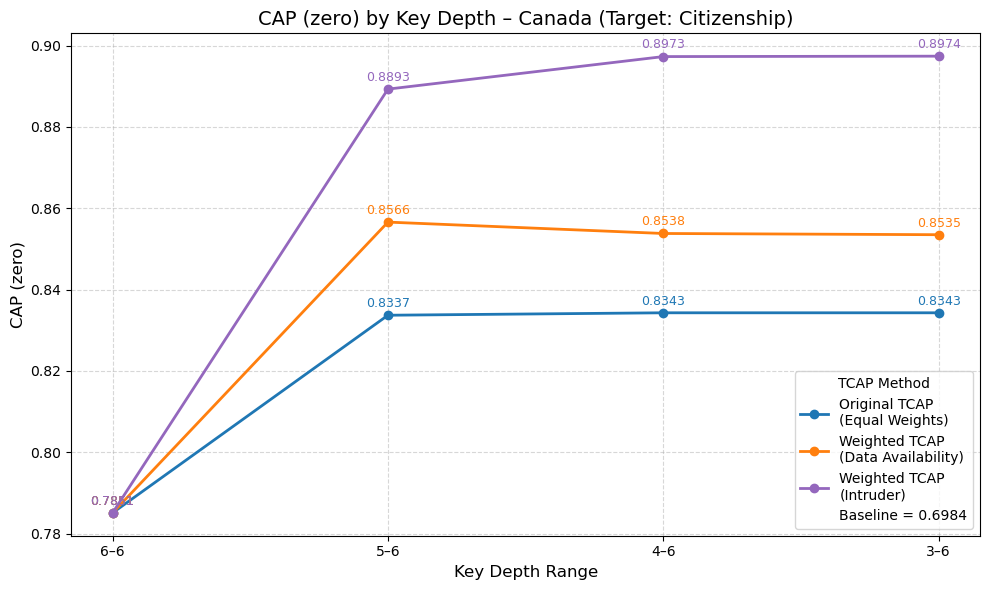

In [366]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for Canada Citizenship (CAP zero)
citizen_data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.8343, 0.8343, 0.8337, 0.7851],  # replace with CAP zero values if different
    'Weighted TCAP\n(Data Availability)': [0.8535, 0.8538, 0.8566, 0.7851],
    'Weighted TCAP\n(Intruder)': [0.8974, 0.8973, 0.8893, 0.7851],
}

# Create DataFrame and melt
citizen_df = pd.DataFrame(citizen_data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
citizen_df_melted = citizen_df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
citizen_df_melted['Depth'] = pd.Categorical(citizen_df_melted['Depth'], categories=depth_order, ordered=True)
citizen_df_melted = citizen_df_melted.sort_values('Depth')

# Consistent colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}
# Plot with legend in bottom-right
plt.figure(figsize=(10, 6))
for method in citizen_df_melted['Method'].unique():
    subset = citizen_df_melted[citizen_df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        plt.text(x, y + 0.002, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

# Titles and labels
plt.title('CAP (zero) by Key Depth – Canada (Target: Citizenship)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Dummy line for baseline
plt.plot([], [], ' ', label='Baseline = 0.6984')

# Legend inside bottom-right corner
plt.legend(title='TCAP Method', loc='lower right')

plt.tight_layout()

# Save the updated plot
citizen_output_path_bottomright = "/Users/idilalp/Desktop/citizen_plot_capzero_bottomright.png"
plt.savefig(citizen_output_path_bottomright, dpi=300)
plt.show()

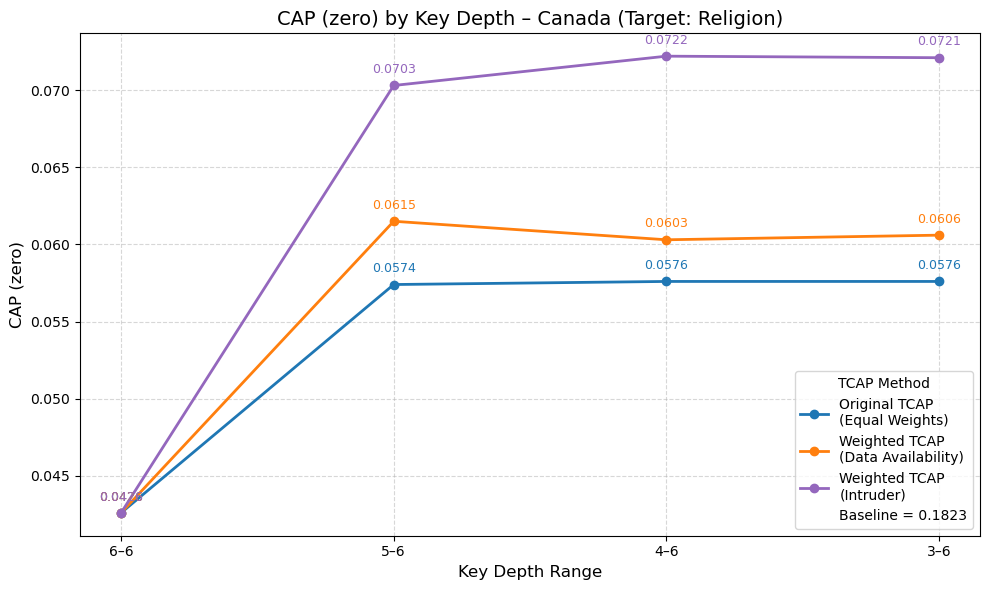

In [368]:
# Data for Canada Religion (CAP zero)
religion_data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.0576, 0.0576, 0.0574, 0.0426],
    'Weighted TCAP\n(Data Availability)': [0.0606, 0.0603, 0.0615, 0.0426],
    'Weighted TCAP\n(Intruder)': [0.0721, 0.0722, 0.0703, 0.0426],
}

# Create DataFrame and melt
religion_df = pd.DataFrame(religion_data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
religion_df_melted = religion_df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
religion_df_melted['Depth'] = pd.Categorical(religion_df_melted['Depth'], categories=depth_order, ordered=True)
religion_df_melted = religion_df_melted.sort_values('Depth')

# Colors for consistency
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}

# Plot with legend at bottom-right
plt.figure(figsize=(10, 6))
for method in religion_df_melted['Method'].unique():
    subset = religion_df_melted[religion_df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        plt.text(x, y + 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
# Titles and labels
plt.title('CAP (zero) by Key Depth – Canada (Target: Religion)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Dummy line for baseline
plt.plot([], [], ' ', label='Baseline = 0.1823')

# Legend inside bottom-right
plt.legend(title='TCAP Method', loc='lower right')

plt.tight_layout()

# Save plot
religion_output_path_bottomright = "/Users/idilalp/Desktop/canada_religion_capzero_bottomright.png"
plt.savefig(religion_output_path_bottomright, dpi=300)
plt.show()


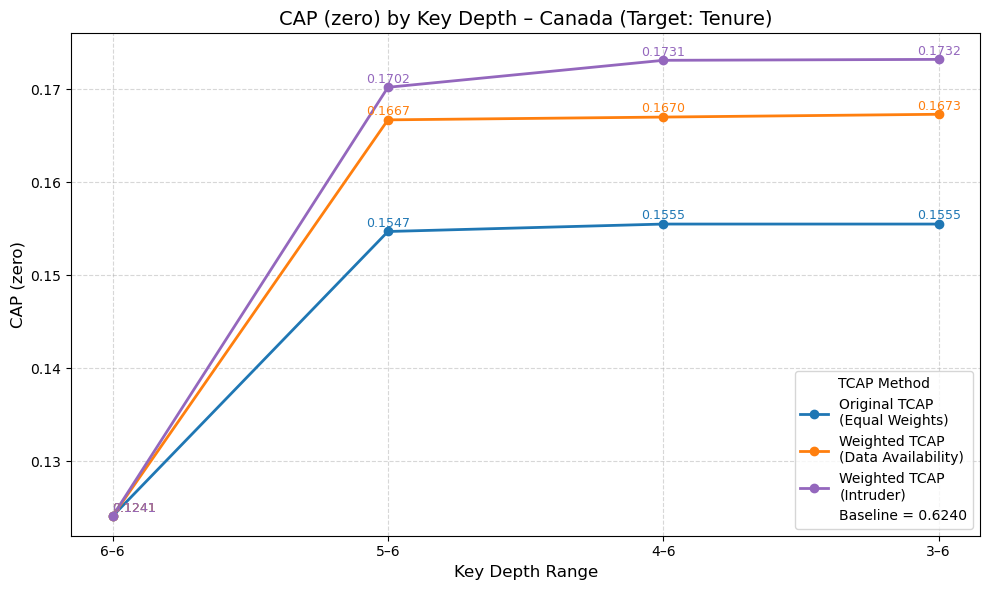

In [370]:
# Canada Tenure CAP (zero) data
data = {
    'Depth': ['6–6', '5–6', '4–6', '3–6'],
    'Original TCAP\n(Equal Weights)': [0.1241, 0.1547, 0.1555, 0.1555],
    'Weighted TCAP\n(Data Availability)': [0.1241, 0.1667, 0.1670, 0.1673],
    'Weighted TCAP\n(Intruder)': [0.1241, 0.1702, 0.1731, 0.1732],
}

# Create DataFrame
df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Define consistent colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}
# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6':  # Shift only for the 0.1241 point
            plt.text(x, y + 0.0005, f'{y:.4f}', ha='left', fontsize=9, color=colors[method])
        else:
            plt.text(x, y + 0.0005, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

plt.ylim(0.122, 0.176)
plt.title('CAP (zero) by Key Depth – Canada (Target: Tenure)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.6240')
plt.legend(title='TCAP Method', loc='lower right')
plt.tight_layout()

# Save
output_path = "/Users/idilalp/Desktop/canada_tenure_capzero_adjusted.png"
plt.savefig(output_path, dpi=300)
plt.show()

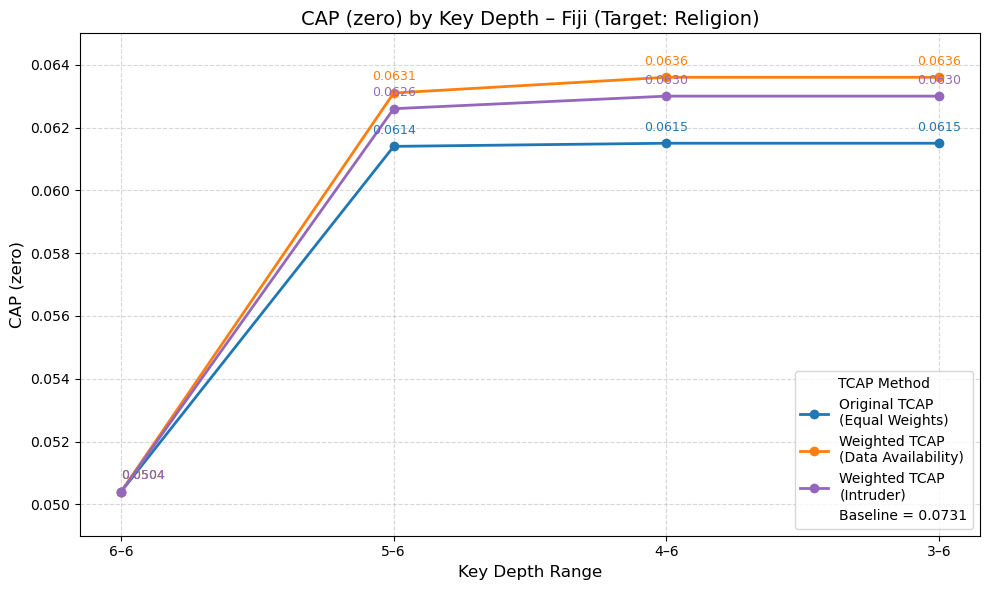

In [372]:
# Fiji Religion CAP (zero) data
data = {
    'Depth': ['6–6', '5–6', '4–6', '3–6'],
    'Original TCAP\n(Equal Weights)': [0.0504, 0.0614, 0.0615, 0.0615],
    'Weighted TCAP\n(Data Availability)': [0.0504, 0.0631, 0.0636, 0.0636],
    'Weighted TCAP\n(Intruder)': [0.0504, 0.0626, 0.0630, 0.0630],
}

# Create DataFrame
df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Define consistent colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}
# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6':  # Shift only for the first depth to avoid overlap
            plt.text(x, y + 0.0004, f'{y:.4f}', ha='left', fontsize=9, color=colors[method])
        else:
            plt.text(x, y + 0.0004, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

plt.ylim(0.049, 0.065)
plt.title('CAP (zero) by Key Depth – Fiji (Target: Religion)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.0731')
plt.legend(title='TCAP Method', loc='lower right')
plt.tight_layout()

# Save
output_path = "/Users/idilalp/Desktop/fiji_religion_capzero_adjusted.png"
plt.savefig(output_path, dpi=300)
plt.show()

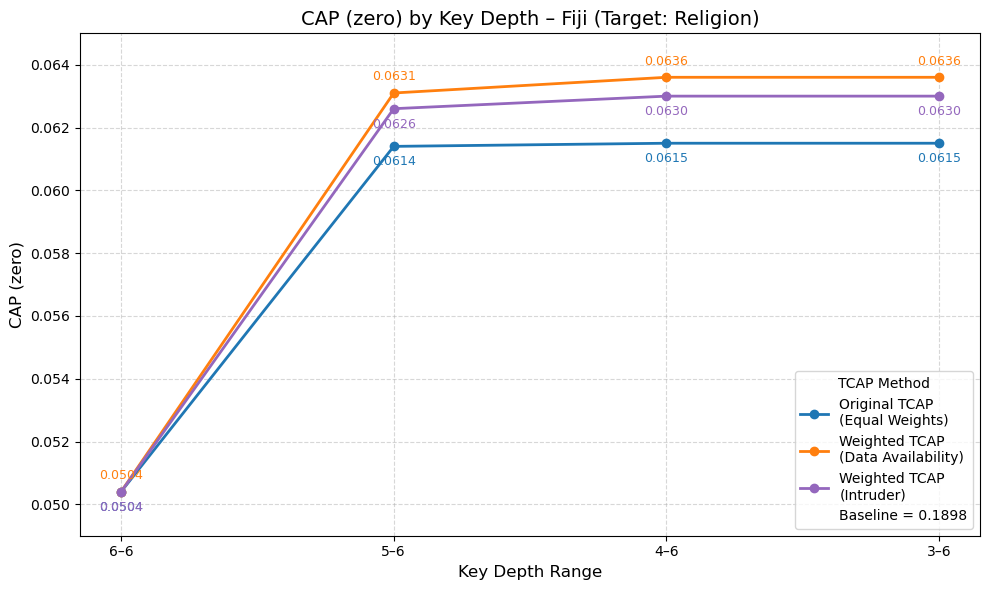

In [374]:
# Fiji Religion CAP (zero) data
data = {
    'Depth': ['6–6', '5–6', '4–6', '3–6'],
    'Original TCAP\n(Equal Weights)': [0.0504, 0.0614, 0.0615, 0.0615],
    'Weighted TCAP\n(Data Availability)': [0.0504, 0.0631, 0.0636, 0.0636],
    'Weighted TCAP\n(Intruder)': [0.0504, 0.0626, 0.0630, 0.0630],
}

# Create DataFrame
df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Define consistent colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}

# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method])

    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if method == 'Weighted TCAP\n(Data Availability)':
            plt.text(x, y + 0.0004, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif method in ['Original TCAP\n(Equal Weights)', 'Weighted TCAP\n(Intruder)']:
            plt.text(x, y - 0.0006, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

plt.ylim(0.049, 0.065)
plt.title('CAP (zero) by Key Depth – Fiji (Target: Religion)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.1898')
plt.legend(title='TCAP Method', loc='lower right')
plt.tight_layout()

# Save
output_path = "/Users/idilalp/Desktop/fiji_religion_capzero_adjusted.png"
plt.savefig(output_path, dpi=300)
plt.show()

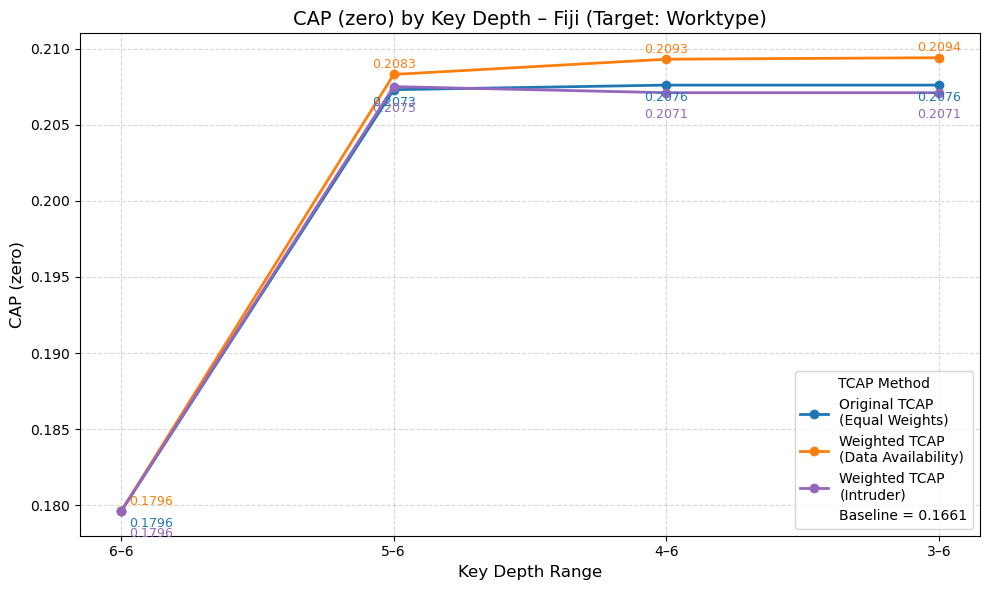

In [376]:
# Fiji Worktype CAP (zero) data
data = {
    'Depth': ['6–6', '5–6', '4–6', '3–6'],
    'Original TCAP\n(Equal Weights)': [0.1796, 0.2073, 0.2076, 0.2076],
    'Weighted TCAP\n(Data Availability)': [0.1796, 0.2083, 0.2093, 0.2094],
    'Weighted TCAP\n(Intruder)': [0.1796, 0.2075, 0.2071, 0.2071],
}

# Create DataFrame and melt
df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}

# Per-method text offsets in points (x, y)
# Orange above, Blue slightly below, Purple further below
text_offsets = {
    'Weighted TCAP\n(Data Availability)': (0, +7),
    'Original TCAP\n(Equal Weights)':    (0, -9),
    'Weighted TCAP\n(Intruder)':         (0, -16),
}

plt.figure(figsize=(10, 6))

# Plot lines
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method], zorder=2)
# Add non-overlapping labels
ax = plt.gca()
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        dx, dy = text_offsets[method]
        # Nudge the first (leftmost) category slightly to the right
        extra_dx = 6 if x == '6–6' else 0
        ax.annotate(f'{y:.4f}',
                    xy=(x, y),
                    xytext=(dx + extra_dx, dy),
                    textcoords='offset points',
                    ha='left' if x == '6–6' else 'center',
                    va='center',
                    fontsize=9,
                    color=colors[method],
                    zorder=3)

# Tidy up axes
plt.ylim(0.178, 0.211)
plt.title('CAP (zero) by Key Depth – Fiji (Target: Worktype)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
# Dummy label for baseline (keep if you want it in legend)
plt.plot([], [], ' ', label='Baseline = 0.1661')
plt.legend(title='TCAP Method', loc='lower right')
plt.tight_layout()

# Save (optional)
# plt.savefig("/Users/idilalp/Desktop/fiji_worktype_capzero_adjusted.png", dpi=300)

plt.show()


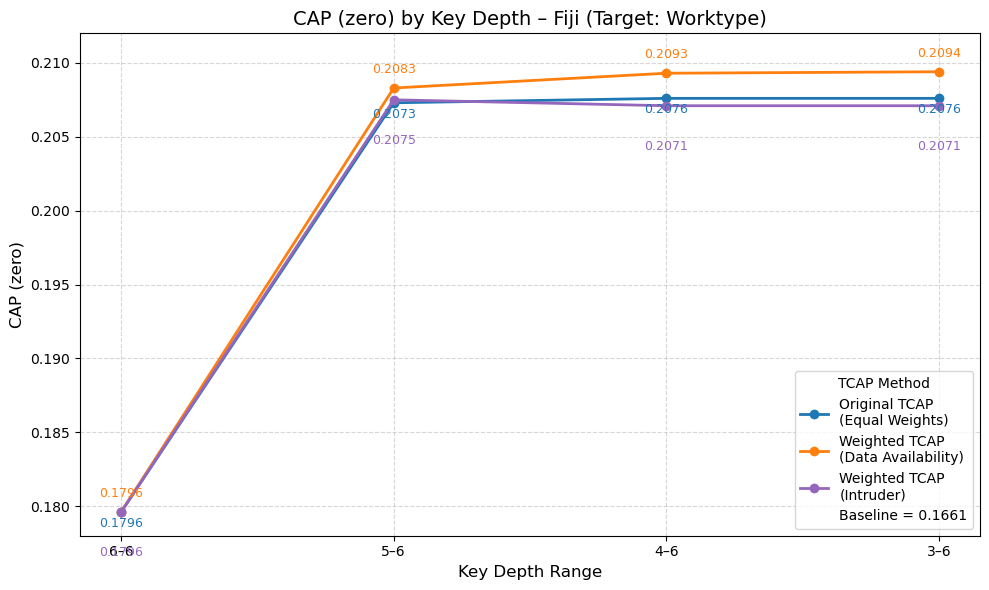

In [378]:
# Fiji - Worktype CAP (zero) data
data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.2076, 0.2076, 0.2073, 0.1796],
    'Weighted TCAP\n(Data Availability)': [0.2094, 0.2093, 0.2083, 0.1796],
    'Weighted TCAP\n(Intruder)': [0.2071, 0.2071, 0.2075, 0.1796],
}

# Create DataFrame
df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Define consistent colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}

# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2, label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        offset = -0.001 if "Equal Weights" in method else (0.001 if "Data Availability" in method else -0.003)
        plt.text(x, y + offset, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

plt.ylim(0.178, 0.212)
plt.title('CAP (zero) by Key Depth – Fiji (Target: Worktype)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.1661')
plt.legend(title='TCAP Method', loc='lower right')
plt.tight_layout()
final_fixed_plot = "/Users/idilalp/Desktop/tenure_plot_final_fixed_for_real.png"
plt.savefig(final_fixed_plot, dpi=300)
plt.show()


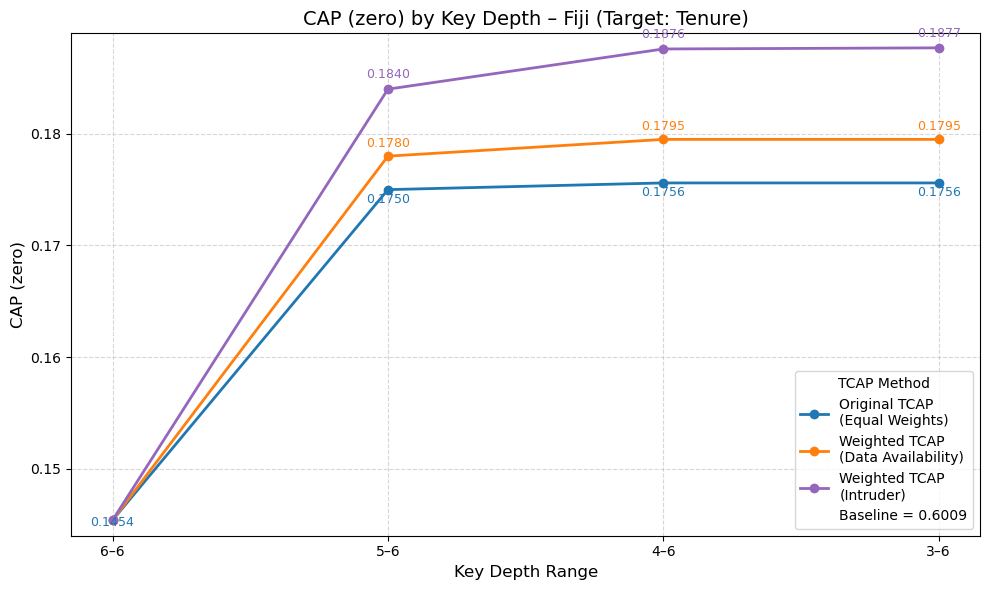

In [380]:
# Fiji - Tenure (CAP zero values)
data = {
    'Depth': ['6–6', '5–6', '4–6', '3–6'],
    'Original TCAP\n(Equal Weights)': [0.1454, 0.1750, 0.1756, 0.1756],
    'Weighted TCAP\n(Data Availability)': [0.1454, 0.1780, 0.1795, 0.1795],
    'Weighted TCAP\n(Intruder)': [0.1454, 0.1840, 0.1876, 0.1877],
}

# Create DataFrame
df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Define consistent colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}

# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6' and method != 'Original TCAP\n(Equal Weights)':
            continue
        if method == 'Original TCAP\n(Equal Weights)':
            if x == '6–6':
                plt.text(x, y - 0.0005, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
            else:
                plt.text(x, y - 0.0012, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif "Data Availability" in method:
            plt.text(x, y + 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif "Intruder" in method:
            plt.text(x, y + 0.001, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

# Set axis limits and labels
plt.ylim(0.144, 0.189)
plt.title('CAP (zero) by Key Depth – Fiji (Target: Tenure)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Dummy line for baseline
plt.plot([], [], ' ', label='Baseline = 0.6009')

# Legend in bottom right corner
plt.legend(title='TCAP Method', loc='lower right')

plt.tight_layout()
final_fixed_plot = "/Users/idilalp/Desktop/tenure_plot_final_fixed_for_real.png"
plt.savefig(final_fixed_plot, dpi=300)
plt.show()


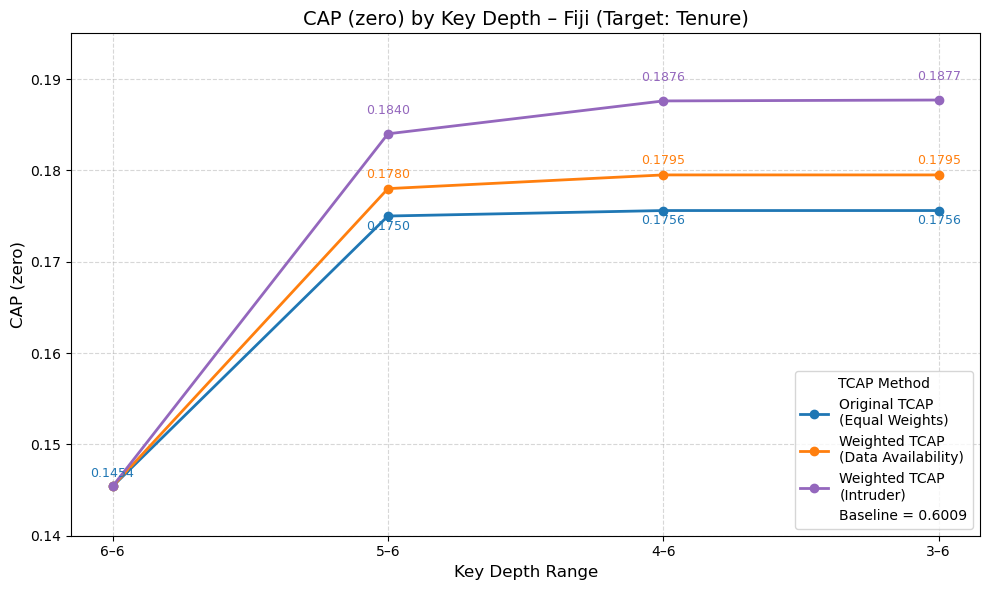

In [382]:
# Fiji Tenure Data
data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.1756, 0.1756, 0.1750, 0.1454],
    'Weighted TCAP\n(Data Availability)': [0.1795, 0.1795, 0.1780, 0.1454],
    'Weighted TCAP\n(Intruder)': [0.1877, 0.1876, 0.1840, 0.1454],
}

df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',
    'Weighted TCAP\n(Intruder)': '#9467bd',
}

# Plotting
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2, label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6':
            if method == 'Original TCAP\n(Equal Weights)':
                plt.text(x, y + 0.001, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif method == 'Original TCAP\n(Equal Weights)':
            plt.text(x, y - 0.0015, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif method == 'Weighted TCAP\n(Data Availability)':
            plt.text(x, y + 0.0012, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif method == 'Weighted TCAP\n(Intruder)':
            plt.text(x, y + 0.0022, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

# Add dummy line to legend for baseline
plt.plot([], [], ' ', label='Baseline = 0.6009')

plt.ylim(0.14, 0.195)
plt.title('CAP (zero) by Key Depth – Fiji (Target: Tenure)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='TCAP Method', loc='lower right')
plt.tight_layout()
final_fixed_plot = "/Users/idilalp/Desktop/tenure_plot_final_fixed_for_real.png"
plt.savefig(final_fixed_plot, dpi=300)
plt.show()


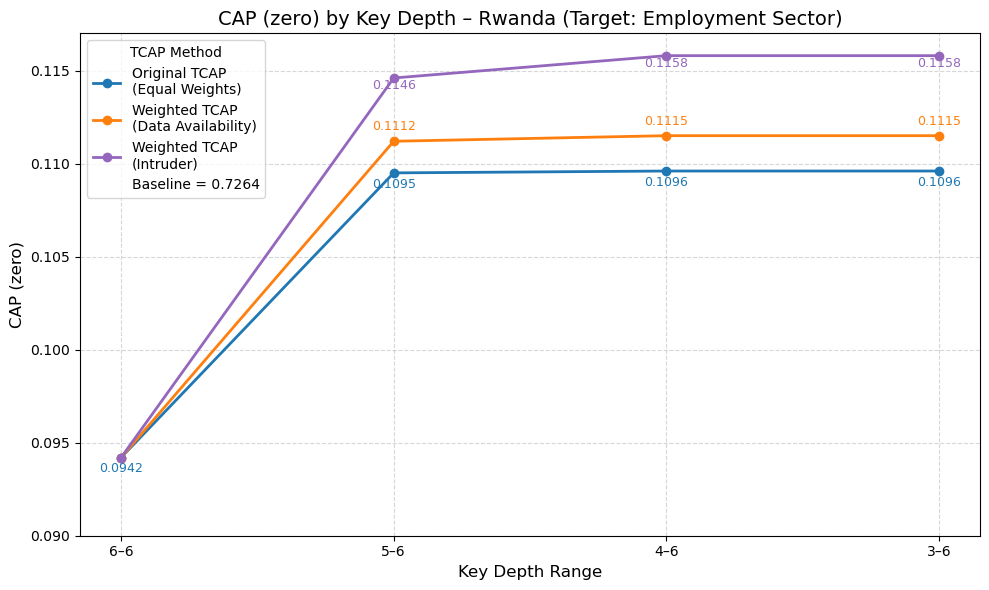

In [384]:
# Final Rwanda Empsector CAP values
data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.1096, 0.1096, 0.1095, 0.0942],
    'Weighted TCAP\n(Data Availability)': [0.1115, 0.1115, 0.1112, 0.0942],
    'Weighted TCAP\n(Intruder)': [0.1158, 0.1158, 0.1146, 0.0942],
}
df = pd.DataFrame(data)

# Melt and sort
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Color scheme
colors_rwanda = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange-yellow
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}

# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors_rwanda[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6' and method != 'Original TCAP\n(Equal Weights)':
            continue
        if "Data Availability" in method:
            plt.text(x, y + 0.0006, f'{y:.4f}', ha='center', fontsize=9, color=colors_rwanda[method])
        elif "Intruder" in method:
                        plt.text(x, y - 0.0006, f'{y:.4f}', ha='center', fontsize=9, color=colors_rwanda[method])
        elif "Equal Weights" in method:
            plt.text(x, y - 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors_rwanda[method])  # below dot

# Final touches
plt.ylim(0.090, 0.117)
plt.title('CAP (zero) by Key Depth – Rwanda (Target: Employment Sector)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.7264')
plt.legend(title='TCAP Method', loc='upper left')
plt.tight_layout()

# Save and display
final_rwanda_empsector = "/Users/idilalp/Desktop/rwanda_plot_empsector_final_final.png"
plt.savefig(final_rwanda_empsector, dpi=300)
plt.show()



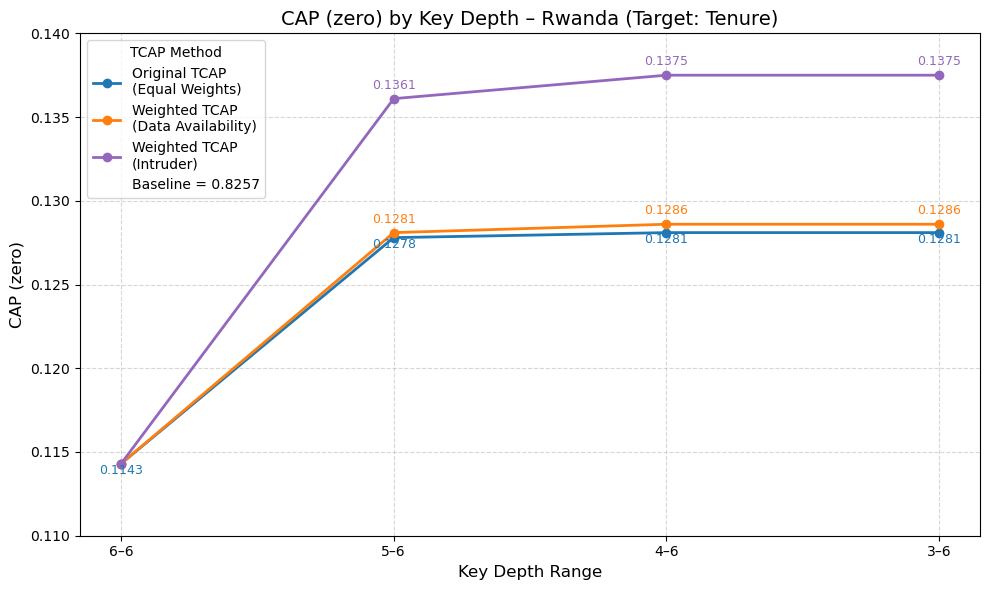

In [386]:
# Rwanda – Tenure CAP (zero) values
rwanda_tenure_data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.1281, 0.1281, 0.1278, 0.1143],
    'Weighted TCAP\n(Data Availability)': [0.1286, 0.1286, 0.1281, 0.1143],
    'Weighted TCAP\n(Intruder)': [0.1375, 0.1375, 0.1361, 0.1143],
}

# Convert to DataFrame and reshape
df = pd.DataFrame(rwanda_tenure_data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Color scheme consistent with earlier Rwanda plots
colors_rwanda = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',  # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange-yellow
    'Weighted TCAP\n(Intruder)': '#9467bd',  # purple
}
# Create the plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2, label=method, color=colors_rwanda[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6' and method != 'Original TCAP\n(Equal Weights)':
            continue  # Only show the blue value at 6–6
        if "Data Availability" in method:
            plt.text(x, y + 0.0006, f'{y:.4f}', ha='center', fontsize=9, color=colors_rwanda[method])
        elif "Intruder" in method:
            plt.text(x, y + 0.0006, f'{y:.4f}', ha='center', fontsize=9, color=colors_rwanda[method])
        elif "Equal Weights" in method:
            plt.text(x, y - 0.0006, f'{y:.4f}', ha='center', fontsize=9, color=colors_rwanda[method])

# Final plot styling
plt.ylim(0.110, 0.140)
plt.title('CAP (zero) by Key Depth – Rwanda (Target: Tenure)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.8257')
plt.legend(title='TCAP Method', loc='upper left')
plt.tight_layout()

# Save the plot
rwanda_plot_tenure_path = "/Users/idilalp/Desktop/rwanda_plot_tenure_final.png"
plt.savefig(rwanda_plot_tenure_path, dpi=300)
plt.show()

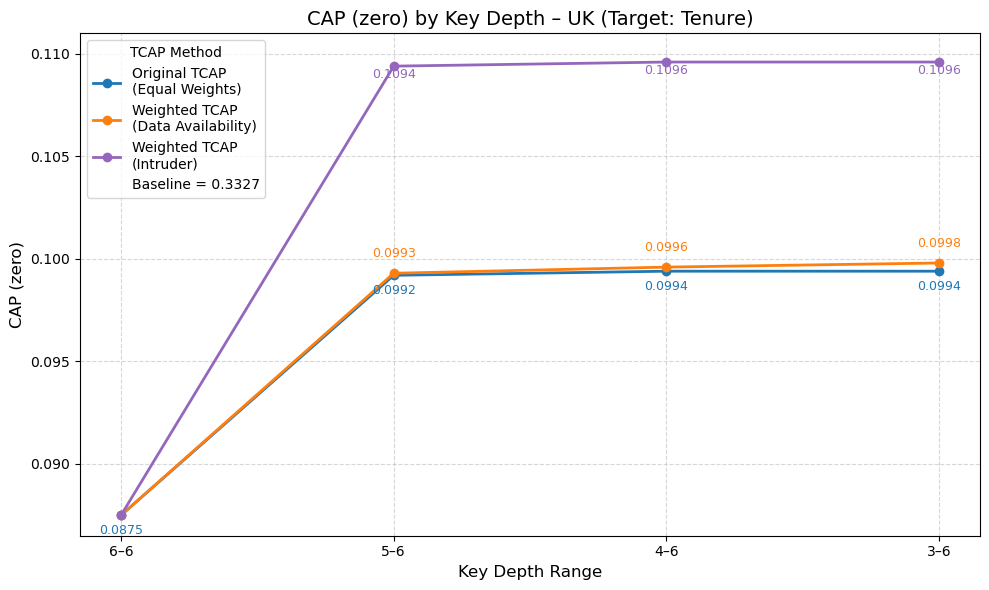

In [388]:
# UK – Tenure CAP values
data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.0994, 0.0994, 0.0992, 0.0875],
    'Weighted TCAP\n(Data Availability)': [0.0998, 0.0996, 0.0993, 0.0875],
    'Weighted TCAP\n(Intruder)': [0.1096, 0.1096, 0.1094, 0.0875],
}
df = pd.DataFrame(data)

# Melt and sort for plotting
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Custom colours
colors_uk = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}
# Plotting
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors_uk[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6' and method != 'Original TCAP\n(Equal Weights)':
            continue
        if "Data Availability" in method:
            plt.text(x, y + 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors_uk[method])
        elif "Intruder" in method:
            plt.text(x, y - 0.0006, f'{y:.4f}', ha='center', fontsize=9, color=colors_uk[method])
        elif "Equal Weights" in method:
            plt.text(x, y - 0.0009, f'{y:.4f}', ha='center', fontsize=9, color=colors_uk[method])
# Final aesthetic touches
plt.ylim(0.0865, 0.111)
plt.title('CAP (zero) by Key Depth – UK (Target: Tenure)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.3327')
plt.legend(title='TCAP Method', loc='upper left')
plt.tight_layout()

# Save
uk_tenure_path = "/Users/idilalp/Desktop/uk_plot_tenure_legend_topleft.png"
plt.savefig(uk_tenure_path, dpi=300)
plt.show()

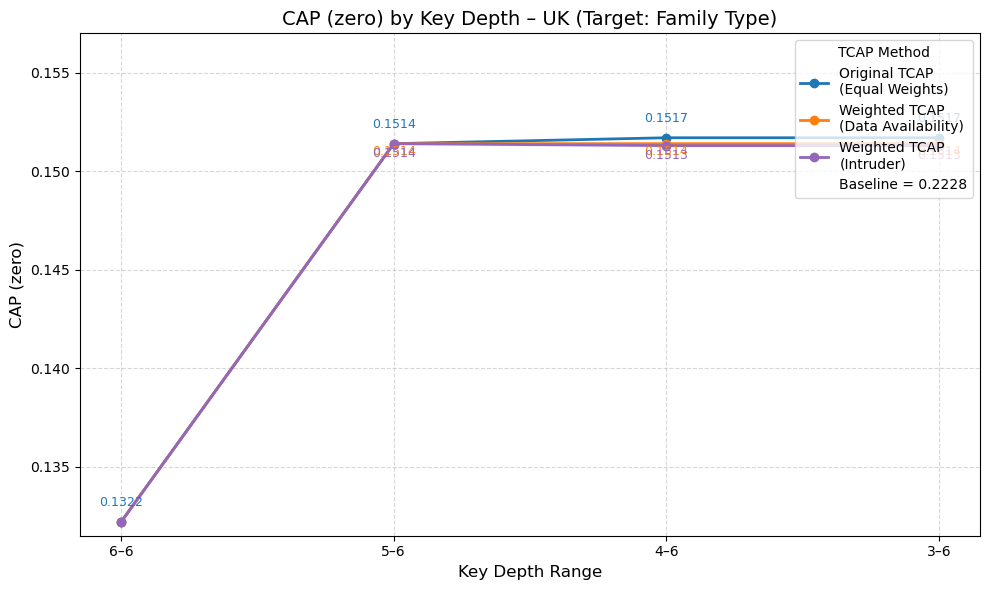

In [390]:
# Final UK Family Type Data
data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.1517, 0.1517, 0.1514, 0.1322],
    'Weighted TCAP\n(Data Availability)': [0.1514, 0.1514, 0.1514, 0.1322],
    'Weighted TCAP\n(Intruder)': [0.1513, 0.1513, 0.1514, 0.1322],
}

# Create DataFrame
df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Define consistent colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}
# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6' and method != 'Original TCAP\n(Equal Weights)':
            continue
        if "Data Availability" in method:
            plt.text(x, y - 0.0006, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif "Intruder" in method:
            plt.text(x, y - 0.0007, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif "Equal Weights" in method:
            plt.text(x, y + 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

plt.ylim(0.1315, 0.157)
plt.title('CAP (zero) by Key Depth – UK (Target: Family Type)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.2228')
plt.legend(title='TCAP Method', loc='upper right')
plt.tight_layout()

# Save
uk_famtype_path = "/Users/idilalp/Desktop/uk_plot_famtype_final_adjusted.png"
plt.savefig(uk_famtype_path, dpi=300)
plt.show()

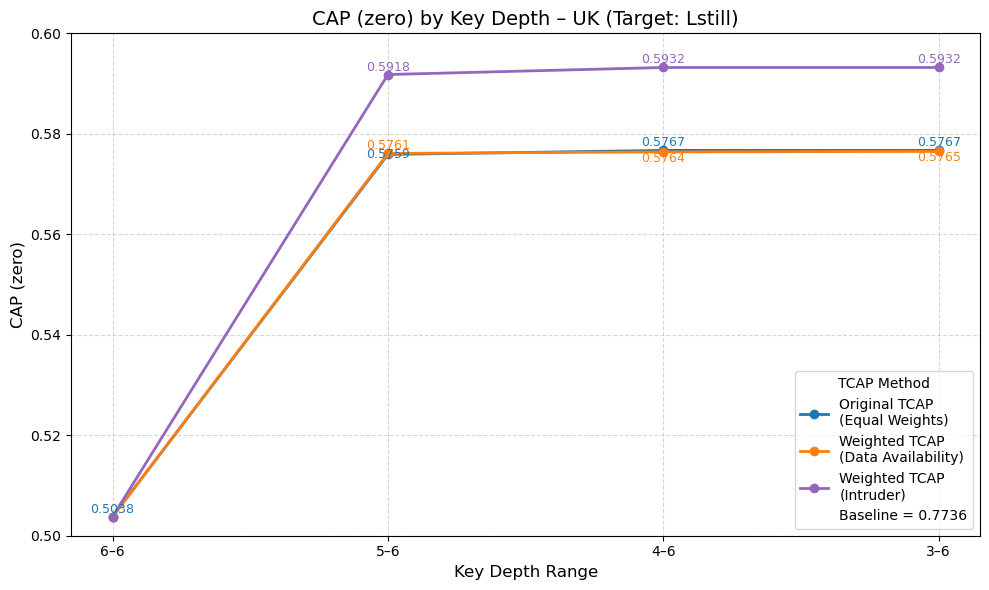

In [392]:
# Data for UK – Lstill
data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.5767, 0.5767, 0.5759, 0.5038],
    'Weighted TCAP\n(Data Availability)': [0.5765, 0.5764, 0.5761, 0.5038],
    'Weighted TCAP\n(Intruder)': [0.5932, 0.5932, 0.5918, 0.5038],
}

colors_uk = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors_uk[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6' and method != 'Original TCAP\n(Equal Weights)':
            continue
        if method == 'Original TCAP\n(Equal Weights)' and x == '5–6':
            plt.text(x, y - 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors_uk[method])
        elif method == 'Original TCAP\n(Equal Weights)':
            plt.text(x, y + 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors_uk[method])
        elif method == 'Weighted TCAP\n(Data Availability)' and x in ['4–6', '3–6']:
            plt.text(x, y - 0.0020, f'{y:.4f}', ha='center', fontsize=9, color=colors_uk[method])
        elif method == 'Weighted TCAP\n(Data Availability)':
            plt.text(x, y + 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors_uk[method])
        elif method == 'Weighted TCAP\n(Intruder)':
            plt.text(x, y + 0.0008, f'{y:.4f}', ha='center', fontsize=9, color=colors_uk[method])

# Aesthetics
plt.ylim(0.500, 0.600)
plt.title('CAP (zero) by Key Depth – UK (Target: Lstill)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.7736')
plt.legend(title='TCAP Method', loc='lower right')
plt.tight_layout()
# Save
uk_mtype_path = "/Users/idilalp/Desktop/uk_plot_famtype_fl_adjusted.png"
plt.savefig(uk_mtype_path, dpi=300)
plt.show()


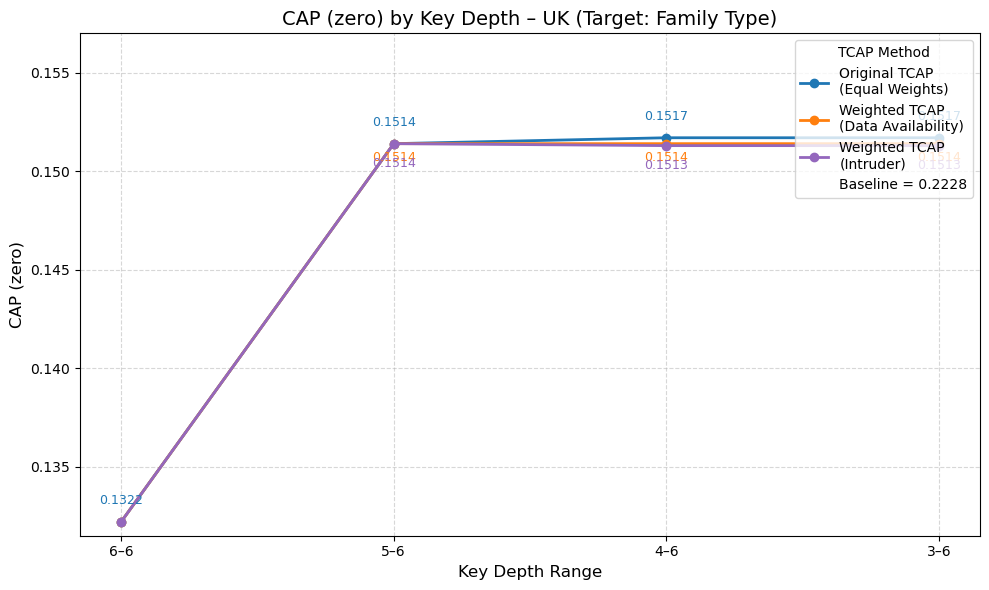

In [394]:
# Final UK Family Type Data
data = {
    'Depth': ['3–6', '4–6', '5–6', '6–6'],
    'Original TCAP\n(Equal Weights)': [0.1517, 0.1517, 0.1514, 0.1322],
    'Weighted TCAP\n(Data Availability)': [0.1514, 0.1514, 0.1514, 0.1322],
    'Weighted TCAP\n(Intruder)': [0.1513, 0.1513, 0.1514, 0.1322],
}

# Create DataFrame
df = pd.DataFrame(data)
depth_order = ['6–6', '5–6', '4–6', '3–6']
df_melted = df.melt(id_vars='Depth', var_name='Method', value_name='CAP (zero)')
df_melted['Depth'] = pd.Categorical(df_melted['Depth'], categories=depth_order, ordered=True)
df_melted = df_melted.sort_values('Depth')

# Define consistent colors
colors = {
    'Original TCAP\n(Equal Weights)': '#1f77b4',      # blue
    'Weighted TCAP\n(Data Availability)': '#ff7f0e',  # orange
    'Weighted TCAP\n(Intruder)': '#9467bd',           # purple
}

# Plot
plt.figure(figsize=(10, 6))
for method in df_melted['Method'].unique():
    subset = df_melted[df_melted['Method'] == method]
    plt.plot(subset['Depth'], subset['CAP (zero)'], marker='o', linewidth=2,
             label=method, color=colors[method])
    for x, y in zip(subset['Depth'], subset['CAP (zero)']):
        if x == '6–6':
            if method == 'Original TCAP\n(Equal Weights)':
                plt.text(x, y + 0.0009, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif method == 'Original TCAP\n(Equal Weights)':
            plt.text(x, y + 0.0009, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif method == 'Weighted TCAP\n(Data Availability)':
            plt.text(x, y - 0.0009, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])
        elif method == 'Weighted TCAP\n(Intruder)':
            plt.text(x, y - 0.0012, f'{y:.4f}', ha='center', fontsize=9, color=colors[method])

plt.ylim(0.1315, 0.157)
plt.title('CAP (zero) by Key Depth – UK (Target: Family Type)', fontsize=14)
plt.xlabel('Key Depth Range', fontsize=12)
plt.ylabel('CAP (zero)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label='Baseline = 0.2228')
plt.legend(title='TCAP Method', loc='upper right')
plt.tight_layout()

# Save
uk_famtype_path = "/Users/idilalp/Desktop/uk_plot_famtype_final_adjusted.png"
plt.savefig(uk_famtype_path, dpi=300)
plt.show()


In [398]:
import pandas as pd

# Manually define the data based on the provided input
data = [
    # Canada
    ["Canada", "Religion", "6–6", 0.0426, 0.0426, 0.0426],
    ["Canada", "Religion", "5–6", 0.0574, 0.0615, 0.0703],
    ["Canada", "Religion", "4–6", 0.0576, 0.0603, 0.0722],
    ["Canada", "Religion", "3–6", 0.0576, 0.0606, 0.0721],
    ["Canada", "Citizen", "6–6", 0.7851, 0.7851, 0.7851],
    ["Canada", "Citizen", "5–6", 0.8337, 0.8566, 0.8893],
    ["Canada", "Citizen", "4–6", 0.8343, 0.8538, 0.8973],
    ["Canada", "Citizen", "3–6", 0.8343, 0.8535, 0.8974],
    ["Canada", "Tenure", "6–6", 0.1241, 0.1241, 0.1241],
    ["Canada", "Tenure", "5–6", 0.1547, 0.1667, 0.1702],
    ["Canada", "Tenure", "4–6", 0.1555, 0.1670, 0.1731],
    ["Canada", "Tenure", "3–6", 0.1555, 0.1673, 0.1732],

        # Fiji
    ["Fiji", "Religion", "6–6", 0.0504, 0.0504, 0.0504],
    ["Fiji", "Religion", "5–6", 0.0614, 0.0631, 0.0626],
    ["Fiji", "Religion", "4–6", 0.0615, 0.0636, 0.0630],
    ["Fiji", "Religion", "3–6", 0.0615, 0.0636, 0.0630],
    ["Fiji", "Worktype", "6–6", 0.1796, 0.1796, 0.1796],
    ["Fiji", "Worktype", "5–6", 0.2073, 0.2083, 0.2075],
    ["Fiji", "Worktype", "4–6", 0.2076, 0.2093, 0.2071],
    ["Fiji", "Worktype", "3–6", 0.2076, 0.2094, 0.2071],
    ["Fiji", "Tenure", "6–6", 0.1454, 0.1454, 0.1454],
    ["Fiji", "Tenure", "5–6", 0.1750, 0.1780, 0.1840],
    ["Fiji", "Tenure", "4–6", 0.1756, 0.1795, 0.1876],
    ["Fiji", "Tenure", "3–6", 0.1756, 0.1795, 0.1877],
    
    # Rwanda
    ["Rwanda", "Religion", "6–6", 0.0141, 0.0141, 0.0141],
    ["Rwanda", "Religion", "5–6", 0.0182, 0.0182, 0.0191],
    ["Rwanda", "Religion", "4–6", 0.0183, 0.0178, 0.0202],
    ["Rwanda", "Religion", "3–6", 0.0183, 0.0177, 0.0202],
    ["Rwanda", "EmpSector", "6–6", 0.0942, 0.0942, 0.0942],
    ["Rwanda", "EmpSector", "5–6", 0.1095, 0.1112, 0.1146],
    ["Rwanda", "EmpSector", "4–6", 0.1096, 0.1115, 0.1158],
    ["Rwanda", "EmpSector", "3–6", 0.1096, 0.1115, 0.1158],
    ["Rwanda", "Tenure", "6–6", 0.1143, 0.1143, 0.1143],
    ["Rwanda", "Tenure", "5–6", 0.1278, 0.1281, 0.1361],
    ["Rwanda", "Tenure", "4–6", 0.1281, 0.1286, 0.1375],
    ["Rwanda", "Tenure", "3–6", 0.1281, 0.1286, 0.1375],
    
    # UK
    ["UK", "Ltill", "6–6", 0.5038, 0.5038, 0.5038],
    ["UK", "Ltill", "5–6", 0.5759, 0.5761, 0.5918],
    ["UK", "Ltill", "4–6", 0.5767, 0.5764, 0.5932],
    ["UK", "Ltill", "3–6", 0.5767, 0.5765, 0.5932],
    ["UK", "Tenure", "6–6", 0.0875, 0.0875, 0.0875],
    ["UK", "Tenure", "5–6", 0.0992, 0.0993, 0.1094],
    ["UK", "Tenure", "4–6", 0.0994, 0.0996, 0.1096],
    ["UK", "Tenure", "3–6", 0.0994, 0.0998, 0.1096],
    ["UK", "Famtype", "6–6", 0.1322, 0.1322, 0.1322],
    ["UK", "Famtype", "5–6", 0.1514, 0.1514, 0.1514],
    ["UK", "Famtype", "4–6", 0.1517, 0.1514, 0.1513],
    ["UK", "Famtype", "3–6", 0.1517, 0.1514, 0.1513],
]

# Create DataFrame
columns = ["Country", "Target", "Depth", "Equal Weights", "Data Availability", "Intruder Perspective"]
tcap_df = pd.DataFrame(data, columns=columns)

tcap_df


,Country,Target,Depth,Equal Weights,Data Availability,Intruder Perspective
0,Canada,Religion,6–6,0.0426,0.0426,0.0426
1,Canada,Religion,5–6,0.0574,0.0615,0.0703
2,Canada,Religion,4–6,0.0576,0.0603,0.0722
3,Canada,Religion,3–6,0.0576,0.0606,0.0721
4,Canada,Citizen,6–6,0.7851,0.7851,0.7851
5,Canada,Citizen,5–6,0.8337,0.8566,0.8893
6,Canada,Citizen,4–6,0.8343,0.8538,0.8973
7,Canada,Citizen,3–6,0.8343,0.8535,0.8974
8,Canada,Tenure,6–6,0.1241,0.1241,0.1241
9,Canada,Tenure,5–6,0.1547,0.1667,0.1702


In [400]:
# Group by Depth and compute the average CAP (zero) for each strategy, rounded to 4 decimals
average_by_depth = tcap_df.groupby("Depth")[["Equal Weights", "Data Availability", "Intruder Perspective"]].mean().round(4)

print(average_by_depth)


       Equal Weights  Data Availability  Intruder Perspective
Depth                                                        
3–6           0.2147             0.2183                0.2273
4–6           0.2147             0.2182                0.2273
5–6           0.2143             0.2182                0.2255
6–6           0.1894             0.1894                0.1894


In [402]:
import pandas as pd


# Group by Country and compute the average CAP (zero) for each strategy, rounded to 4 decimals
average_by_country = tcap_df.groupby("Country")[["Equal Weights", "Data Availability", "Intruder Perspective"]].mean().round(4)

print(average_by_country)

         Equal Weights  Data Availability  Intruder Perspective
Country                                                        
Canada          0.3410             0.3499                0.3639
Fiji            0.1424             0.1441                0.1454
Rwanda          0.0825             0.0830                0.0866
UK              0.2671             0.2671                0.2737


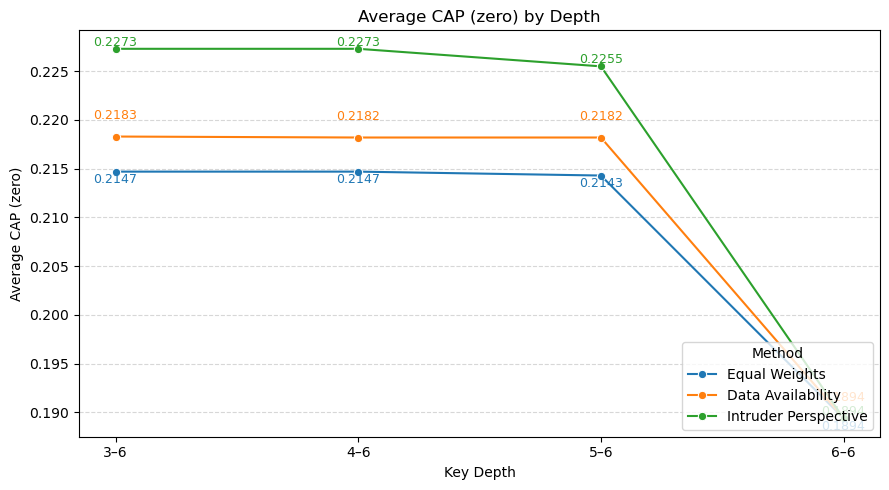

In [404]:

df = pd.DataFrame(
    {
        "Depth": ["3–6", "4–6", "5–6", "6–6"],
        "Equal Weights": [0.2147, 0.2147, 0.2143, 0.1894],
        "Data Availability": [0.2183, 0.2182, 0.2182, 0.1894],
        "Intruder Perspective": [0.2273, 0.2273, 0.2255, 0.1894],
    }
)

# Ensure desired depth order
depth_order = ["3–6", "4–6", "5–6", "6–6"]
df["Depth"] = pd.Categorical(df["Depth"], categories=depth_order, ordered=True)

# --- Melt to long format ---
melted_df = df.melt(id_vars="Depth", var_name="Method", value_name="CAP (zero)")

# --- Plot ---
plt.figure(figsize=(9,5))
ax = sns.lineplot(data=melted_df, x="Depth", y="CAP (zero)", hue="Method", marker="o")

# Label values at each point (slight vertical offsets to avoid overlap)
offset = {"Equal Weights": -0.0015, "Data Availability": 0.0015, "Intruder Perspective": 0.0}
palette = dict(zip(melted_df["Method"].unique(), sns.color_palette(n_colors=3)))

for _, row in melted_df.iterrows():
    y = row["CAP (zero)"] + offset.get(row["Method"], 0)
    ax.text(row["Depth"], y, f"{row['CAP (zero)']:.4f}",
            ha="center", va="bottom", fontsize=9, color=palette[row["Method"]])

# Cosmetics
ax.set_title("Average CAP (zero) by Depth")
ax.set_ylabel("Average CAP (zero)")
ax.set_xlabel("Key Depth")
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.legend(title="Method", loc="lower right")
plt.tight_layout()

# Save 
plt.savefig("/Users/idilalp/Desktop/uk_plot_famtype_final_adjusted.png", dpi=300)
plt.show()
